In [1]:
import pandas as pd
import numpy as np

In [2]:
# from google.colab import files
# uploaded = files.upload()

In [3]:
# import io
# df = pd.read_csv(io.BytesIO(uploaded['flight.csv.xls']))
# df

In [4]:
df = pd.read_csv('flight.csv.xls')
df

MEMBER_NO   FFP_DATE FIRST_FLIGHT_DATE  GENDER  FFP_TIER    WORK_CITY  \
0          54993  11/2/2006        12/24/2008    Male         6            .   
1          28065  2/19/2007          8/3/2007    Male         6          NaN   
2          55106   2/1/2007         8/30/2007    Male         6            .   
3          21189  8/22/2008         8/23/2008    Male         5  Los Angeles   
4          39546  4/10/2009         4/15/2009    Male         6      guiyang   
...          ...        ...               ...     ...       ...          ...   
62983      18375  5/20/2011          6/5/2013  Female         4    guangzhou   
62984      36041   3/8/2010         9/14/2013    Male         4       foshan   
62985      45690  3/30/2006         12/2/2006  Female         4    guangzhou   
62986      61027   2/6/2013         2/14/2013  Female         4    guangzhou   
62987      61340  2/17/2013         2/17/2013  Female         4     shanghai   

      WORK_PROVINCE WORK_COUNTRY   AGE  LOAD_TIME  ...  SUM_YR_2  SEG_KM_SUM  \
0           beijing           CN  31.0  3/31/2014  ...  234188.0      580717   
1           beijing           CN  42.0  3/31/2014  ...  167434.0      293678   
2           beijing           CN  40.0  3/31/2014  ...  164982.0      283712   
3                CA           US  64.0  3/31/2014  ...  125500.0      281336   
4           guizhou           CN  48.0  3/31/2014  ...  130702.0      309928   
...             ...          ...   ...        ...  ...       ...         ...   
62983     guangdong           CN  25.0  3/31/2014  ...       0.0        1134   
62984     guangdong           CN  38.0  3/31/2014  ...       0.0        8016   
62985     guangdong           CN  43.0  3/31/2014  ...       0.0        2594   
62986     guangdong           CN  36.0  3/31/2014  ...       0.0        3934   
62987             .           CN  29.0  3/31/2014  ...       0.0        4222   

       LAST_FLIGHT_DATE  LAST_TO_END  AVG_INTERVAL MAX_INTERVAL  \
0             3/31/2014            1      3.483254           18   
1             3/25/2014            7      5.194245           17   
2             3/21/2014           11      5.298507           18   
3            12/26/2013           97     27.863636           73   
4             3/27/2014            5      4.788079           47   
...                 ...          ...           ...          ...   
62983          6/9/2013          297      4.000000            4   
62984          1/3/2014           89     37.000000           60   
62985          3/3/2014           29    166.000000          166   
62986         2/26/2013          400     12.000000           12   
62987         2/23/2013          403      6.000000            6   

       EXCHANGE_COUNT  avg_discount  Points_Sum  Point_NotFlight  
0                  34      0.961639      619760               50  
1                  29      1.252314      415768               33  
2                  20      1.254676      406361               26  
3                  11      1.090870      372204               12  
4                  27      0.970658      338813               39  
...               ...           ...         ...              ...  
62983               1      0.000000       12318               22  
62984              14      0.000000      106972               43  
62985               0      0.000000           0                0  
62986               0      0.000000           0                0  
62987               0      0.000000           0                0  

[62988 rows x 23 columns]

# EDA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   GENDER             62985 non-null  object 
 4   FFP_TIER           62988 non-null  int64  
 5   WORK_CITY          60719 non-null  object 
 6   WORK_PROVINCE      59740 non-null  object 
 7   WORK_COUNTRY       62962 non-null  object 
 8   AGE                62568 non-null  float64
 9   LOAD_TIME          62988 non-null  object 
 10  FLIGHT_COUNT       62988 non-null  int64  
 11  BP_SUM             62988 non-null  int64  
 12  SUM_YR_1           62437 non-null  float64
 13  SUM_YR_2           62850 non-null  float64
 14  SEG_KM_SUM         62988 non-null  int64  
 15  LAST_FLIGHT_DATE   62988 non-null  object 
 16  LAST_TO_END        629

In [6]:
df.describe()

MEMBER_NO      FFP_TIER           AGE  FLIGHT_COUNT         BP_SUM  \
count  62988.000000  62988.000000  62568.000000  62988.000000   62988.000000   
mean   31494.500000      4.102162     42.476346     11.839414   10925.081254   
std    18183.213715      0.373856      9.885915     14.049471   16339.486151   
min        1.000000      4.000000      6.000000      2.000000       0.000000   
25%    15747.750000      4.000000     35.000000      3.000000    2518.000000   
50%    31494.500000      4.000000     41.000000      7.000000    5700.000000   
75%    47241.250000      4.000000     48.000000     15.000000   12831.000000   
max    62988.000000      6.000000    110.000000    213.000000  505308.000000   

            SUM_YR_1       SUM_YR_2     SEG_KM_SUM   LAST_TO_END  \
count   62437.000000   62850.000000   62988.000000  62988.000000   
mean     5355.376064    5604.026014   17123.878691    176.120102   
std      8109.450147    8703.364247   20960.844623    183.822223   
min         0.000000       0.000000     368.000000      1.000000   
25%      1003.000000     780.000000    4747.000000     29.000000   
50%      2800.000000    2773.000000    9994.000000    108.000000   
75%      6574.000000    6845.750000   21271.250000    268.000000   
max    239560.000000  234188.000000  580717.000000    731.000000   

       AVG_INTERVAL  MAX_INTERVAL  EXCHANGE_COUNT  avg_discount   Points_Sum  \
count  62988.000000  62988.000000    62988.000000  62988.000000   62988.0000   
mean      67.749788    166.033895        0.319775      0.721558   12545.7771   
std       77.517866    123.397180        1.136004      0.185427   20507.8167   
min        0.000000      0.000000        0.000000      0.000000       0.0000   
25%       23.370370     79.000000        0.000000      0.611997    2775.0000   
50%       44.666667    143.000000        0.000000      0.711856    6328.5000   
75%       82.000000    228.000000        0.000000      0.809476   14302.5000   
max      728.000000    728.000000       46.000000      1.500000  985572.0000   

       Point_NotFlight  
count     62988.000000  
mean          2.728155  
std           7.364164  
min           0.000000  
25%           0.000000  
50%           0.000000  
75%           1.000000  
max         140.000000

In [7]:
df.isna().sum()

MEMBER_NO               0
FFP_DATE                0
FIRST_FLIGHT_DATE       0
GENDER                  3
FFP_TIER                0
WORK_CITY            2269
WORK_PROVINCE        3248
WORK_COUNTRY           26
AGE                   420
LOAD_TIME               0
FLIGHT_COUNT            0
BP_SUM                  0
SUM_YR_1              551
SUM_YR_2              138
SEG_KM_SUM              0
LAST_FLIGHT_DATE        0
LAST_TO_END             0
AVG_INTERVAL            0
MAX_INTERVAL            0
EXCHANGE_COUNT          0
avg_discount            0
Points_Sum              0
Point_NotFlight         0
dtype: int64

EDA fokus untuk fitur yang digunakan dalam analisis RFM.

1. R (Recency): Waktu kapan terakhir customer terbang (**'LAST_TO_END'**)
2. F (Frequency): Berapa kali customer terbang (**'FLIGHT_COUNT'**)
3. M (Monetary): Berapa total jarak yang ditempuh oleh customer selama terbang (**'SEG_KM_SUM'**)

In [8]:
# drop kolom yang tidak dibutuhkan dalam pemodelan dan analisis RFM

df_rfm = df[['LAST_TO_END', 'FLIGHT_COUNT', 'SEG_KM_SUM']]
df_rfm.head()

LAST_TO_END  FLIGHT_COUNT  SEG_KM_SUM
0            1           210      580717
1            7           140      293678
2           11           135      283712
3           97            23      281336
4            5           152      309928

In [9]:
df_rfm.describe()

LAST_TO_END  FLIGHT_COUNT     SEG_KM_SUM
count  62988.000000  62988.000000   62988.000000
mean     176.120102     11.839414   17123.878691
std      183.822223     14.049471   20960.844623
min        1.000000      2.000000     368.000000
25%       29.000000      3.000000    4747.000000
50%      108.000000      7.000000    9994.000000
75%      268.000000     15.000000   21271.250000
max      731.000000    213.000000  580717.000000

In [10]:
df_rfm.isna().sum()

LAST_TO_END     0
FLIGHT_COUNT    0
SEG_KM_SUM      0
dtype: int64

Outlier Checking dengan menggunakan Boxplot

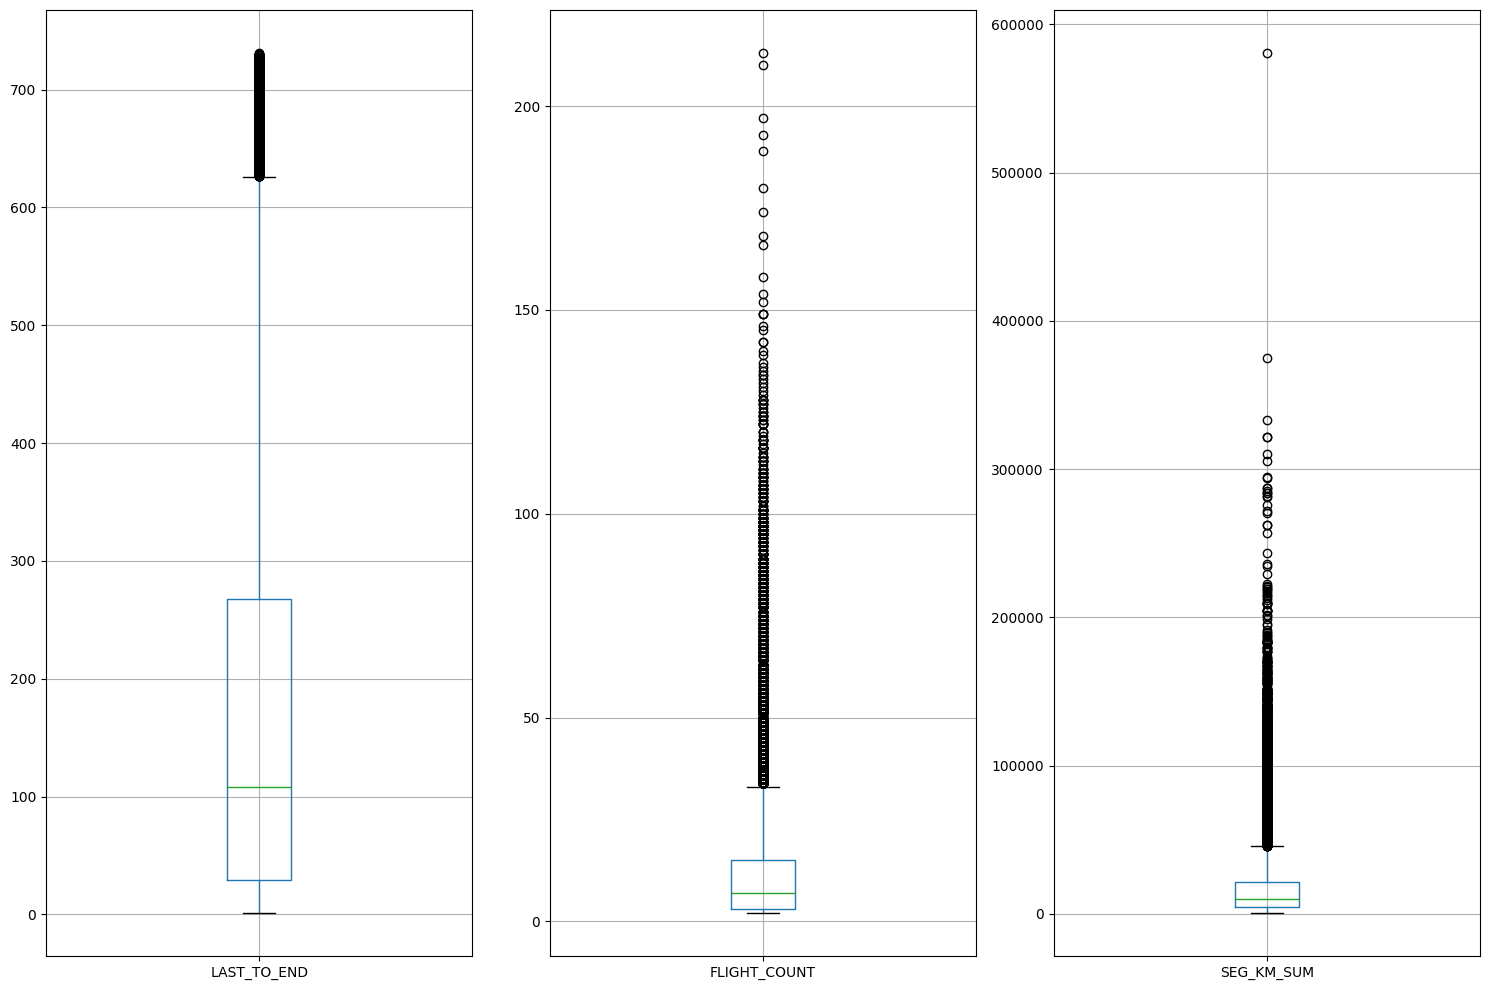

In [11]:
import matplotlib.pyplot as plt


list_columns = list(df_rfm.columns.values)

num_rows = 1
num_cols = 3

fig, ax = plt.subplots(num_rows, num_cols, figsize=(15,10))

for i, column_name in enumerate(list_columns):
    df_rfm.boxplot(column_name, ax=ax.flatten()[i])

plt.tight_layout()
plt.show()


# **Baseline**.
(tanpa handle outlier)



#### Scaling

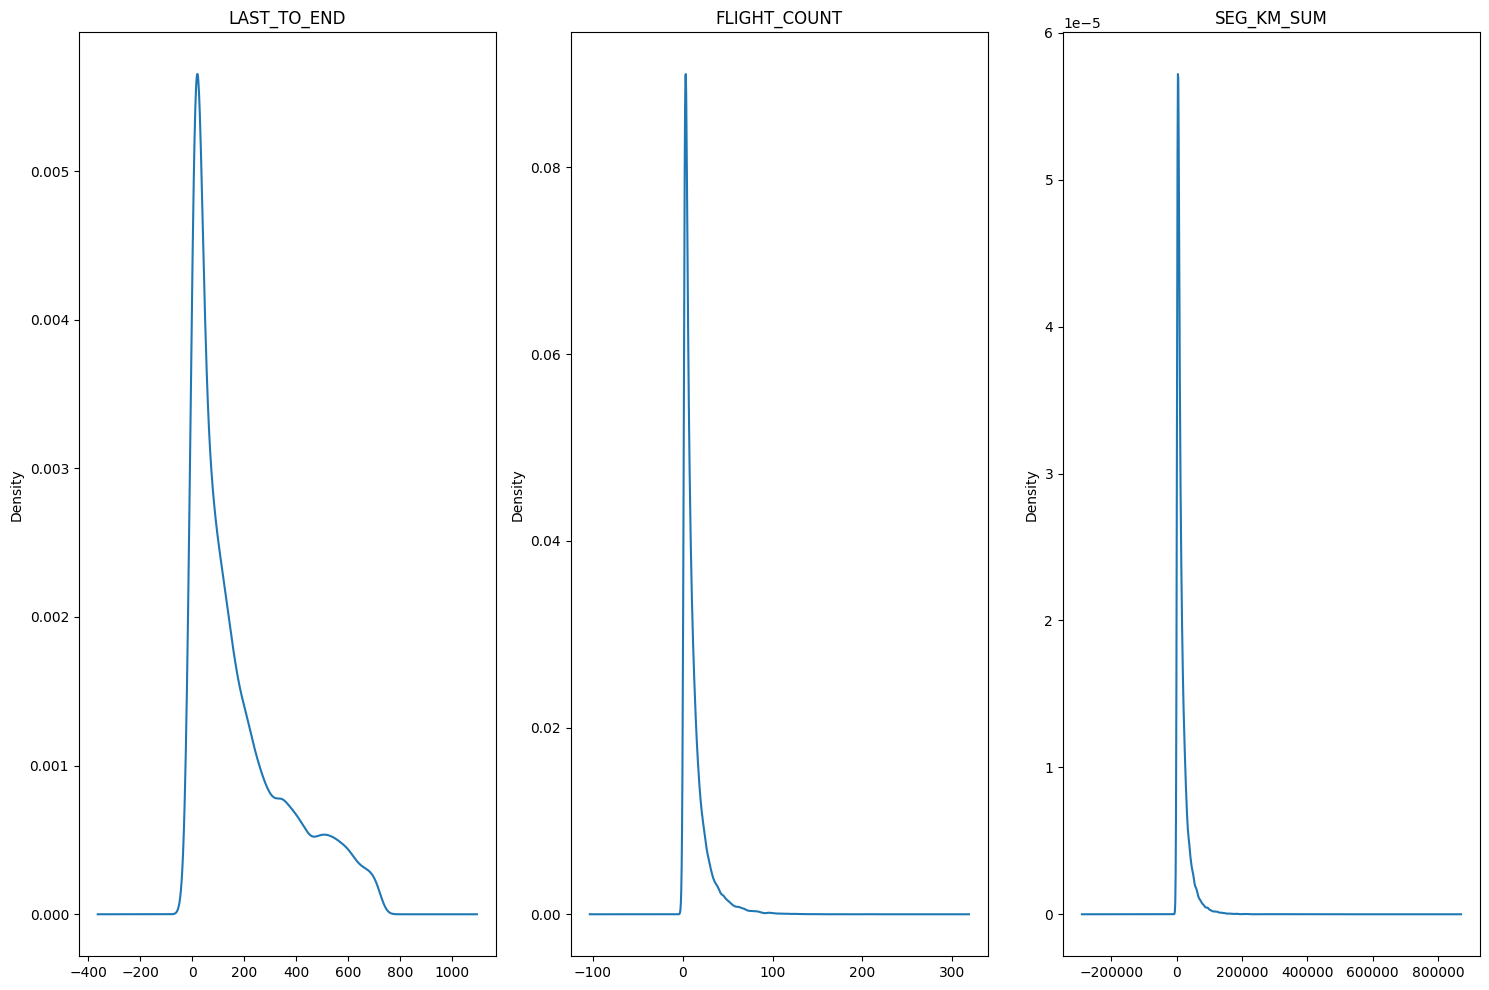

In [12]:
list_columns = list(df_rfm.columns.values)

num_rows = 1
num_cols = 3

fig, ax = plt.subplots(num_rows, num_cols, figsize=(15,10))

for i, column_name in enumerate(list_columns):
    df_rfm[column_name].plot(ax=ax.flatten()[i], kind='kde')
    ax.flatten()[i].set_title(column_name)

plt.tight_layout()
plt.show()

Kita akan melakukan standardization, dengan menggunakan **StandardScaler()** karena kita akan menggunakan K-Means Clustering untuk pemodelan. K-Means menggunakan Euclidean Distance untuk menghitung kesamaan antara titik data, dan Euclidean Distance peka terhadap perbedaan skala. Menggunakan StandardScaler menskalakan data untuk memiliki rata-rata nol dan varian unit, yang membantu mengurangi efek perbedaan skala. Ini akan membantu memastikan bahwa algoritma K-means tidak bias terhadap fitur dengan skala yg lebih besar.

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_rfm_scaled = scaler.fit_transform(df_rfm)
df_rfm_scaled = pd.DataFrame(df_rfm_scaled, columns=df_rfm.columns)

df_rfm_scaled.head()

LAST_TO_END  FLIGHT_COUNT  SEG_KM_SUM
0    -0.952668     14.104600   26.888115
1    -0.920027      9.122166   13.193949
2    -0.898267      8.766278   12.718487
3    -0.430420      0.794384   12.605132
4    -0.930907      9.976297   13.969210

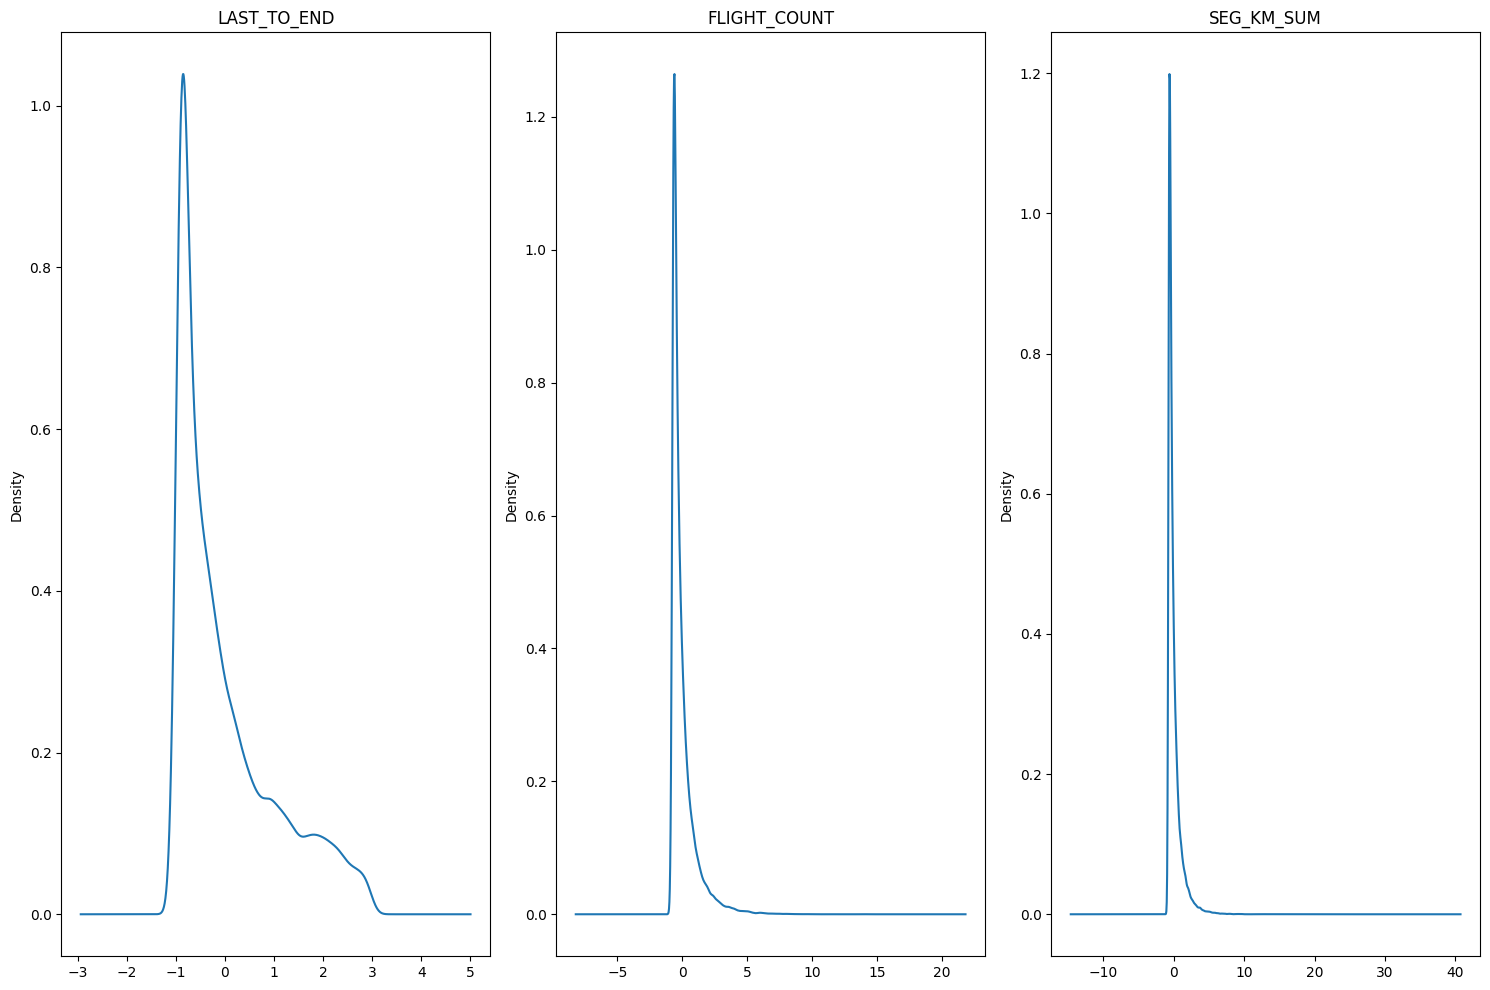

In [14]:
list_columns_scaled = list(df_rfm_scaled.columns.values)

num_rows = 1
num_cols = 3

fig, ax = plt.subplots(num_rows, num_cols, figsize=(15,10))

for i, column_name in enumerate(list_columns_scaled):
    df_rfm_scaled[column_name].plot(ax=ax.flatten()[i], kind='kde')
    ax.flatten()[i].set_title(column_name)

plt.tight_layout()
plt.show()

#### Pemodelan

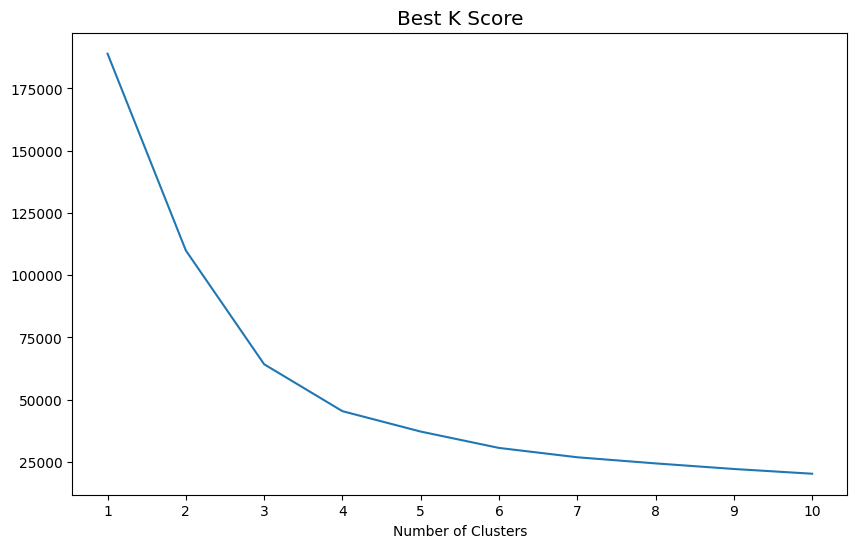

In [15]:
from sklearn.cluster import KMeans

score = []
k_value = range(1, 11)

for k in k_value:
    kmeans = KMeans(n_clusters= k, init='k-means++', random_state=42)
    kmeans.fit(df_rfm_scaled)
    cluster = kmeans.fit_predict(df_rfm_scaled)
    score.append(kmeans.inertia_)

fig, ax = plt.subplots(figsize=(10, 6))
plt.plot(k_value, score)
plt.xlabel('Number of Clusters')
plt.xticks(k_value)
plt.style.use('ggplot')
plt.title('Best K Score')
plt.show()

In [16]:
df_rfm.corr()

LAST_TO_END  FLIGHT_COUNT  SEG_KM_SUM
LAST_TO_END      1.000000     -0.404999   -0.369509
FLIGHT_COUNT    -0.404999      1.000000    0.850411
SEG_KM_SUM      -0.369509      0.850411    1.000000

 For k = 8, the silhouette score is: [0.5398243954237708, 0.4958202063496775, 0.4828319047726393, 0.42961413221154493, 0.40925999309285604, 0.39622107486889885, 0.3657692950468537]


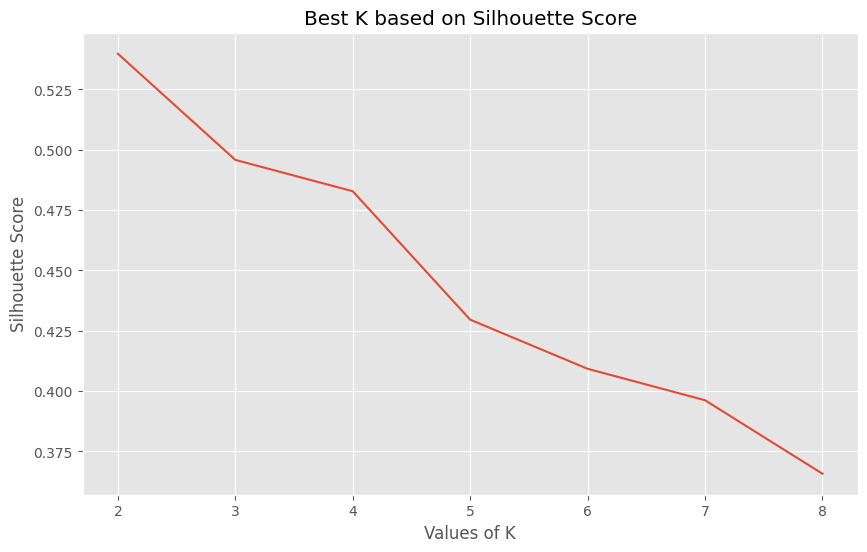

In [17]:
# Calculate Silhouette Score
from sklearn.metrics import silhouette_score

k_value = [2, 3, 4, 5, 6, 7, 8]
silhouette_avg = []

for k in k_value:
    kmeans = KMeans(n_clusters = k, random_state=42)
    kmeans.fit(df_rfm_scaled)
    cluster_labels = kmeans.predict(df_rfm_scaled)

    silhouette_avg.append(silhouette_score(df_rfm_scaled, cluster_labels))

print(" For k = {}, the silhouette score is: {}".format(k, silhouette_avg))
fig, ax = plt.subplots(figsize=(10, 6))
plt.plot(k_value, silhouette_avg)
plt.xlabel('Values of K')
plt.xticks(k_value)
plt.ylabel('Silhouette Score')
plt.style.use('ggplot')
plt.title('Best K based on Silhouette Score')
plt.show()

1) K-Means dengan menggunakan Euclidean Distance

In [18]:
df_2_result = df_rfm_scaled.copy()
df_2_result

LAST_TO_END  FLIGHT_COUNT  SEG_KM_SUM
0        -0.952668     14.104600   26.888115
1        -0.920027      9.122166   13.193949
2        -0.898267      8.766278   12.718487
3        -0.430420      0.794384   12.605132
4        -0.930907      9.976297   13.969210
...            ...           ...         ...
62983     0.657597     -0.700346   -0.762851
62984    -0.473940     -0.557991   -0.434522
62985    -0.800345     -0.700346   -0.693197
62986     1.217925     -0.700346   -0.629268
62987     1.234245     -0.700346   -0.615528

[62988 rows x 3 columns]

In [19]:
# k = 2 (berdasarkan nilai silhouette)

kmeans = KMeans(n_clusters=2, init='k-means++', n_init=10, max_iter=10000, random_state=42)
kmeans.fit(df_2_result)
df_2_result['cluster'] = kmeans.labels_

df_2_result
# plt.scatter(df_rfm_scaled.iloc[:, 0], df_rfm_scaled.iloc[:, 1], c=labels)
# plt.show()

LAST_TO_END  FLIGHT_COUNT  SEG_KM_SUM  cluster
0        -0.952668     14.104600   26.888115        1
1        -0.920027      9.122166   13.193949        1
2        -0.898267      8.766278   12.718487        1
3        -0.430420      0.794384   12.605132        1
4        -0.930907      9.976297   13.969210        1
...            ...           ...         ...      ...
62983     0.657597     -0.700346   -0.762851        0
62984    -0.473940     -0.557991   -0.434522        0
62985    -0.800345     -0.700346   -0.693197        0
62986     1.217925     -0.700346   -0.629268        0
62987     1.234245     -0.700346   -0.615528        0

[62988 rows x 4 columns]

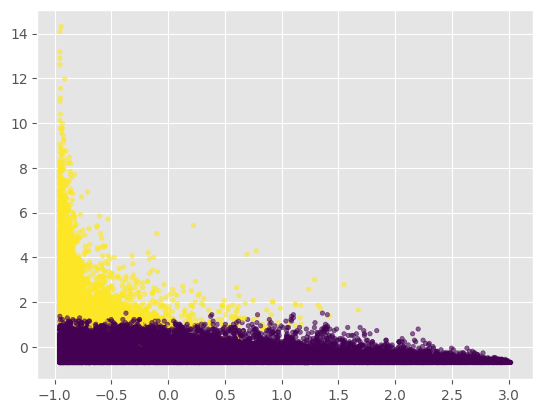

In [20]:
plt.scatter(df_2_result.iloc[:, 0], df_2_result.iloc[:, 1], c=df_2_result['cluster'], alpha=0.6, s=10)
plt.show()

In [21]:
df_2_result = df_2_result.rename(columns={'LAST_TO_END' : 'R', 'FLIGHT_COUNT' : 'F', 'SEG_KM_SUM' : 'M'})
df_2_result

R          F          M  cluster
0     -0.952668  14.104600  26.888115        1
1     -0.920027   9.122166  13.193949        1
2     -0.898267   8.766278  12.718487        1
3     -0.430420   0.794384  12.605132        1
4     -0.930907   9.976297  13.969210        1
...         ...        ...        ...      ...
62983  0.657597  -0.700346  -0.762851        0
62984 -0.473940  -0.557991  -0.434522        0
62985 -0.800345  -0.700346  -0.693197        0
62986  1.217925  -0.700346  -0.629268        0
62987  1.234245  -0.700346  -0.615528        0

[62988 rows x 4 columns]

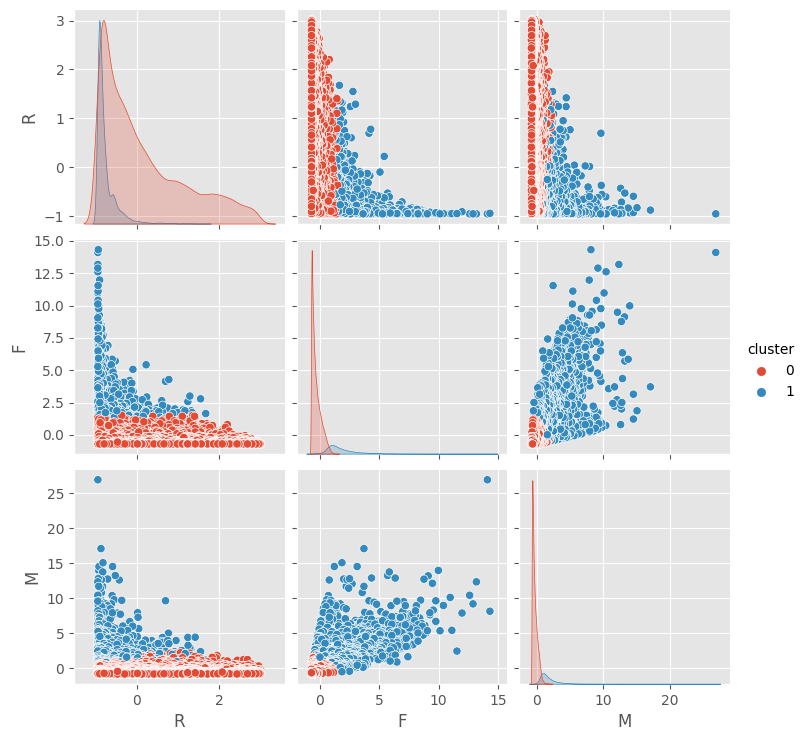

In [22]:
import seaborn as sns 

sns.pairplot(data=df_2_result, hue='cluster')

In [23]:
df_rfm['cluster'] = df_2_result['cluster']
df_rfm

C:\Users\Asus\AppData\Local\Temp\ipykernel_9536\129835320.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rfm['cluster'] = df_2_result['cluster']


LAST_TO_END  FLIGHT_COUNT  SEG_KM_SUM  cluster
0                1           210      580717        1
1                7           140      293678        1
2               11           135      283712        1
3               97            23      281336        1
4                5           152      309928        1
...            ...           ...         ...      ...
62983          297             2        1134        0
62984           89             4        8016        0
62985           29             2        2594        0
62986          400             2        3934        0
62987          403             2        4222        0

[62988 rows x 4 columns]

In [24]:
df_rfm = df_rfm.rename(columns={'LAST_TO_END' : 'R', 'FLIGHT_COUNT' : 'F', 'SEG_KM_SUM' : 'M'})
df_rfm

R    F       M  cluster
0        1  210  580717        1
1        7  140  293678        1
2       11  135  283712        1
3       97   23  281336        1
4        5  152  309928        1
...    ...  ...     ...      ...
62983  297    2    1134        0
62984   89    4    8016        0
62985   29    2    2594        0
62986  400    2    3934        0
62987  403    2    4222        0

[62988 rows x 4 columns]

In [25]:
df_2_gby = df_rfm.groupby('cluster').agg({'mean', 'count'})

In [26]:
df_2_gby

R                 F                    M       
               mean  count       mean  count          mean  count
cluster                                                          
0        201.693344  53366   7.261871  53366  10470.907094  53366
1         34.284556   9622  37.227603   9622  54022.910310   9622

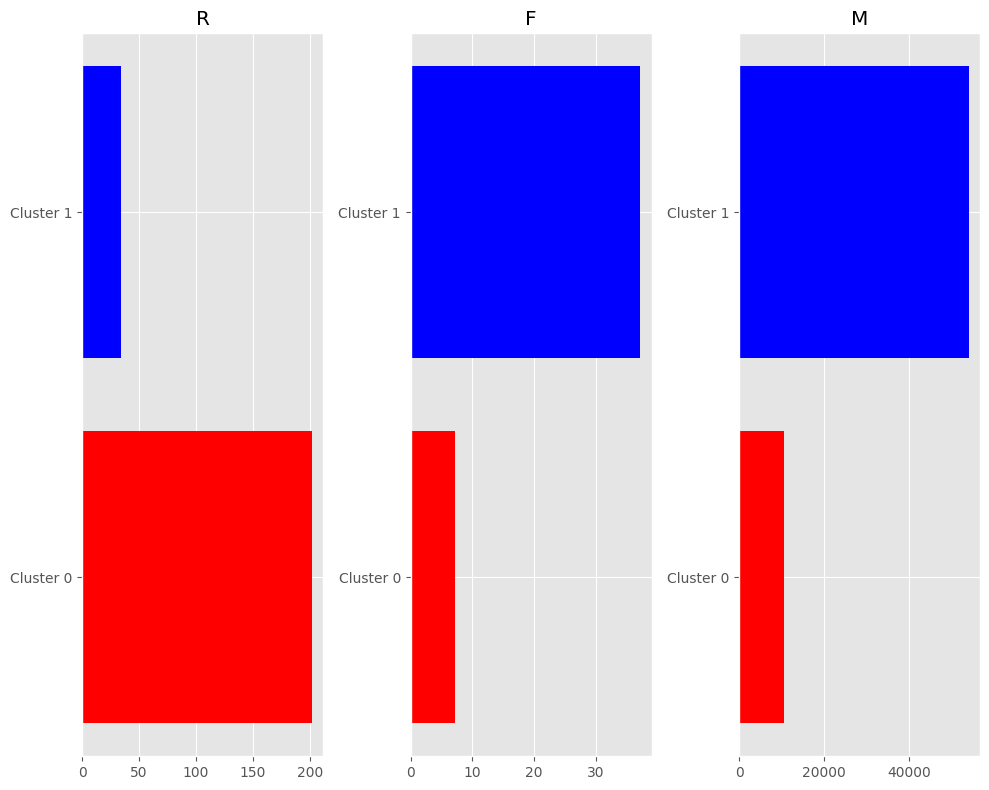

In [27]:
cluster_0 = df_rfm[df_2_result['cluster'] == 0].mean()
cluster_1 = df_rfm[df_2_result['cluster'] == 1].mean()

num_rows = 1
num_cols = 3

fig, ax = plt.subplots(num_rows, num_cols, figsize=(10, 8))
colors = ['red', 'blue']

for key, column_name in enumerate(['R', 'F', 'M']):
    ax[key].barh(y = [0,1], width = [cluster_0[column_name], cluster_1[column_name]], color=colors)
    ax[key].set_title(column_name)
    ax[key].set_yticks([0, 1])
    ax[key].set_yticklabels(['Cluster 0', 'Cluster 1'])

plt.tight_layout()
plt.show()



In [28]:
df_3_result = df_rfm_scaled
df_3_result

LAST_TO_END  FLIGHT_COUNT  SEG_KM_SUM
0        -0.952668     14.104600   26.888115
1        -0.920027      9.122166   13.193949
2        -0.898267      8.766278   12.718487
3        -0.430420      0.794384   12.605132
4        -0.930907      9.976297   13.969210
...            ...           ...         ...
62983     0.657597     -0.700346   -0.762851
62984    -0.473940     -0.557991   -0.434522
62985    -0.800345     -0.700346   -0.693197
62986     1.217925     -0.700346   -0.629268
62987     1.234245     -0.700346   -0.615528

[62988 rows x 3 columns]

In [29]:
# k = 3 (berdasarkan elbow method)

from mpl_toolkits.mplot3d import Axes3D

kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=10000, random_state=42)
kmeans.fit(df_rfm_scaled)
df_3_result['cluster'] = kmeans.labels_

df_3_result

LAST_TO_END  FLIGHT_COUNT  SEG_KM_SUM  cluster
0        -0.952668     14.104600   26.888115        1
1        -0.920027      9.122166   13.193949        1
2        -0.898267      8.766278   12.718487        1
3        -0.430420      0.794384   12.605132        1
4        -0.930907      9.976297   13.969210        1
...            ...           ...         ...      ...
62983     0.657597     -0.700346   -0.762851        2
62984    -0.473940     -0.557991   -0.434522        0
62985    -0.800345     -0.700346   -0.693197        0
62986     1.217925     -0.700346   -0.629268        2
62987     1.234245     -0.700346   -0.615528        2

[62988 rows x 4 columns]

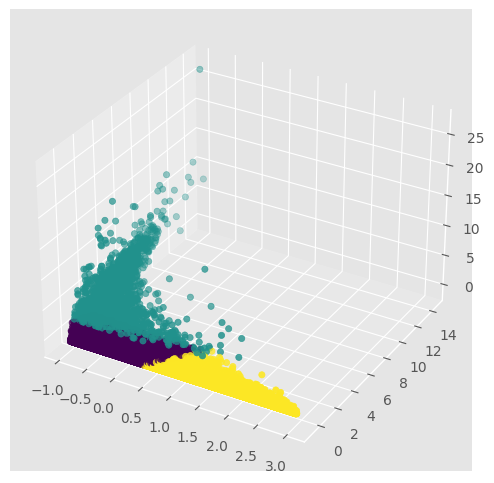

In [30]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_rfm_scaled.iloc[:, 0], df_rfm_scaled.iloc[:, 1], df_rfm_scaled.iloc[:, 2], c=df_3_result['cluster'])

plt.show()

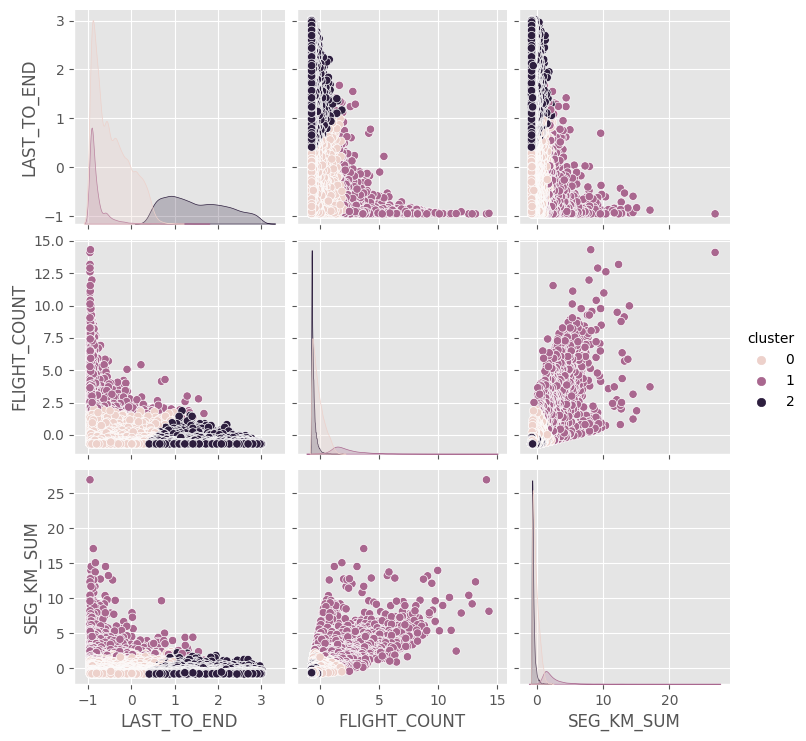

In [31]:
import seaborn as sns 

sns.pairplot(data=df_3_result, hue='cluster')

In [32]:
df_rfm['cluster'] = df_3_result['cluster']
df_rfm

R    F       M  cluster
0        1  210  580717        1
1        7  140  293678        1
2       11  135  283712        1
3       97   23  281336        1
4        5  152  309928        1
...    ...  ...     ...      ...
62983  297    2    1134        2
62984   89    4    8016        0
62985   29    2    2594        0
62986  400    2    3934        2
62987  403    2    4222        2

[62988 rows x 4 columns]

In [33]:
df_3_gby = df_rfm.groupby('cluster').agg({'mean', 'count'})
df_3_gby

R                 F                    M       
               mean  count       mean  count          mean  count
cluster                                                          
0         92.476755  40654   9.766394  40654  13901.452280  40654
1         30.424487   6575  43.483650   6575  63403.370951   6575
2        452.684942  15759   3.984580  15759   6128.057999  15759

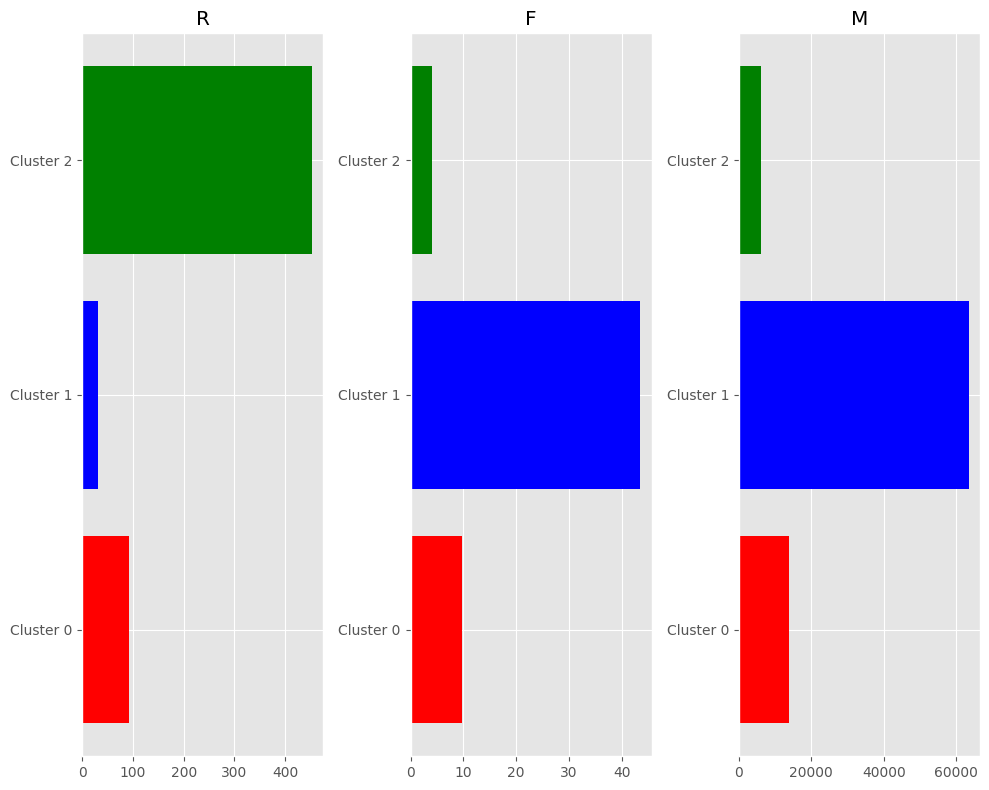

In [34]:
cluster_0 = df_rfm[df_rfm['cluster'] == 0].mean()
cluster_1 = df_rfm[df_rfm['cluster'] == 1].mean()
cluster_2 = df_rfm[df_rfm['cluster'] == 2].mean()

num_rows = 1
num_cols = 3

fig, ax = plt.subplots(num_rows, num_cols, figsize=(10, 8))
colors = ['red', 'blue', 'green']

for key, column_name in enumerate(['R', 'F', 'M']):
    ax[key].barh(y = [0,1,2], width = [cluster_0[column_name], cluster_1[column_name], cluster_2[column_name]], color=colors)
    ax[key].set_title(column_name)
    ax[key].set_yticks([0, 1, 2])
    ax[key].set_yticklabels(['Cluster 0', 'Cluster 1', 'Cluster 2'])



plt.tight_layout()
plt.show()

Kesimpulannya, untuk Baseline saya dapatkan:

> Ketika k = 2
- Cluster 0: Waktu terbang yang ditempuh baru saja, tetapi customer cluster ini tidak sering terbang dan sekali terbang ke tujuan yang dekat saja (jarak yang ditempuh tidak terlalu jauh)
- Cluster 1: Waktu terbang yang ditempuh sudah lama, tetapi customer cluster ini sering terbang dan sekali terbang ke tujuan yang jauh (jarak yang ditempuh cukup jauh)

> Ketika k = 3
- Cluster 0: Customer ini sudah lama tidak terbang, jarang terbang, dan sekali terbang ke tujuan yang dekat.
- Cluster 1: Customer cluster ini sudah lama tidak terbang, tetapi dia sering terbang dan sekali terbang ke tujuan yang jaraknya jauh.
- Cluster 2: Customer cluster ini waktu terbang yang ditempuh baru saja, tetapi dia jarang terbang dan terbang ke tujuan yang dekat.

# **Handle Outlier**

In [99]:
df_rfm_cleaning = df_rfm[['R', 'F', 'M']]
df_rfm_cleaning

R    F       M
0        1  210  580717
1        7  140  293678
2       11  135  283712
3       97   23  281336
4        5  152  309928
...    ...  ...     ...
62983  297    2    1134
62984   89    4    8016
62985   29    2    2594
62986  400    2    3934
62987  403    2    4222

[62988 rows x 3 columns]

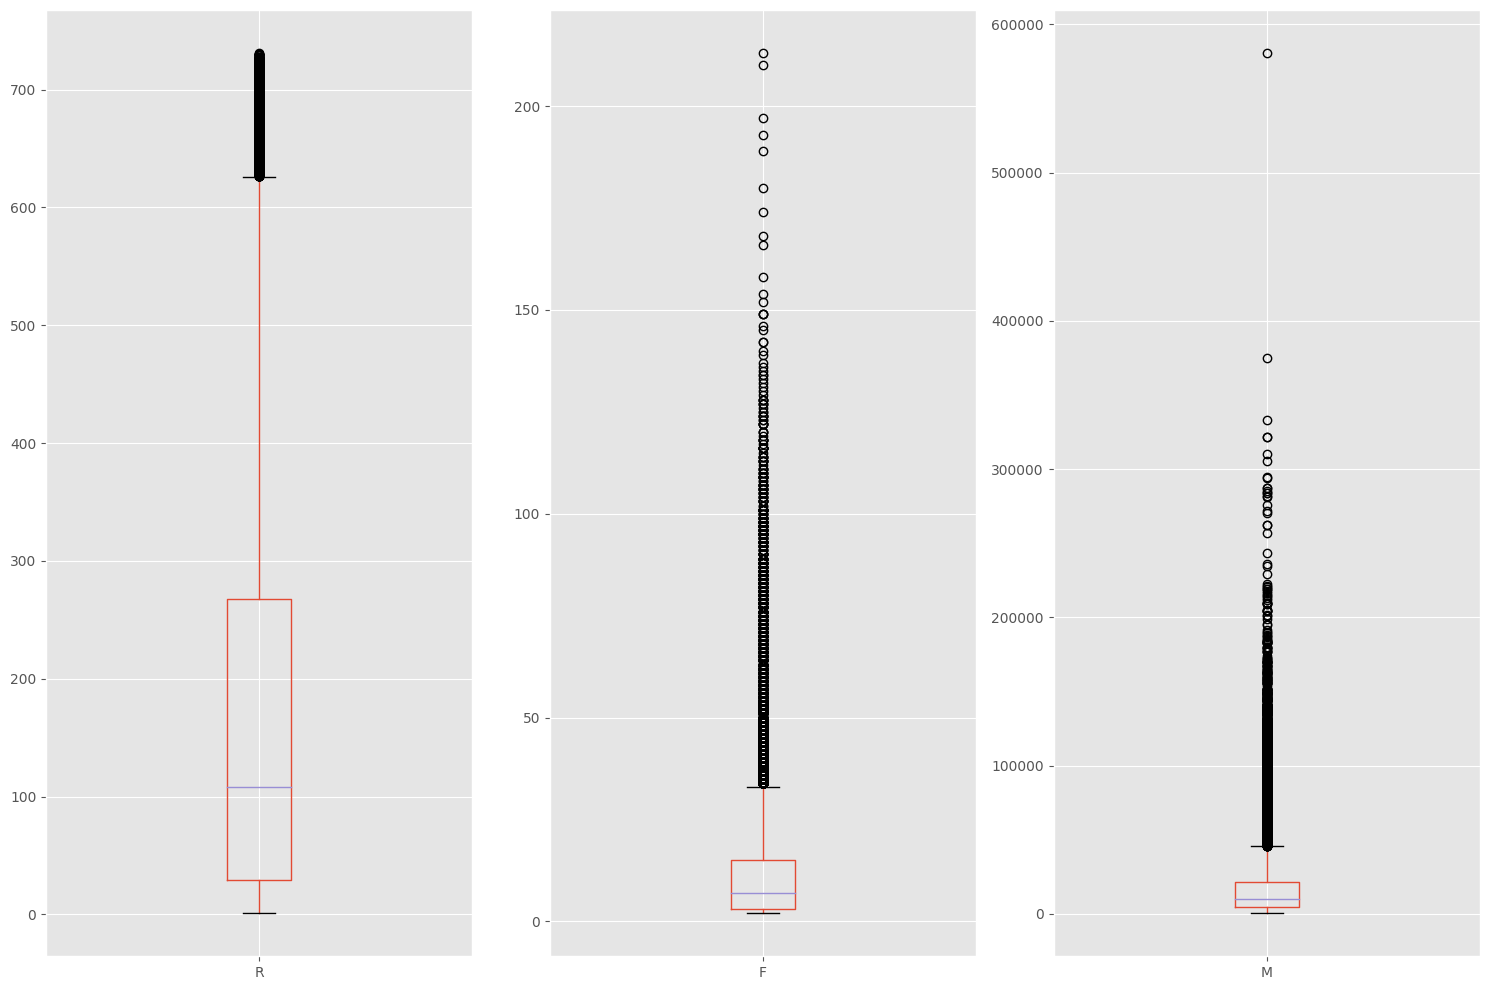

In [100]:
list_columns = list(df_rfm_cleaning.columns.values)

num_rows = 1
num_cols = 3

fig, ax = plt.subplots(num_rows, num_cols, figsize=(15,10))

for i, column_name in enumerate(list_columns):
    df_rfm_cleaning.boxplot(column_name, ax=ax.flatten()[i])

plt.tight_layout()
plt.show()

In [101]:
for i, j in df_rfm_cleaning.items():
    q1 = j.quantile(0.25)
    q3 = j.quantile(0.75)
    inter_q = q3 - q1

    j_col = j[(j < q1 - 1.5 * inter_q) | (j > q3 + 1.5 * inter_q)]
    percent = np.shape(j_col)[0] * 100.0 / np.shape(df)[0]
    print("Column %s outliers = %.2f" %(i, percent))

Column R outliers = 2.91
Column F outliers = 6.83
Column M outliers = 7.61


### 1. Handle Outlier dengan Menghapusnya.

In [102]:
# Menghapus outlier pada kolom Recency (R)

Q1 = np.percentile(df_rfm_cleaning['R'], 25, method = 'midpoint')
Q3 = np.percentile(df_rfm_cleaning['R'], 75, method = 'midpoint')

IQR = Q3 - Q1

print('Old Shape before Removing Outliers: ', df_rfm_cleaning.shape)

upper_bound = Q3 + 1.5 * IQR
upper_arr = np.array(df_rfm_cleaning['R'] > upper_bound)

lower_bound = Q1 - 1.5 * IQR
lower_arr = np.array(df_rfm_cleaning['R'] < lower_bound)

df_rfm_cleaning.loc[upper_arr, 'R'] = np.nan
df_rfm_cleaning.loc[lower_arr, 'R'] = np.nan

df_rfm_cleaning.dropna(inplace = True)

print('New Shape after Removing Outliers: ', df_rfm_cleaning.shape)


Old Shape before Removing Outliers:  (62988, 3)
New Shape after Removing Outliers:  (61153, 3)


C:\Users\Asus\AppData\Local\Temp\ipykernel_9536\4241837116.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rfm_cleaning.dropna(inplace = True)


In [103]:
# Menghapus outlier pada kolom Frequency (F)

Q1 = np.percentile(df_rfm_cleaning['F'], 25, method = 'midpoint')
Q3 = np.percentile(df_rfm_cleaning['F'], 75, method = 'midpoint')

IQR = Q3 - Q1

print('Old Shape before Removing Outliers: ', df_rfm_cleaning.shape)

upper_bound = Q3 + 1.5 * IQR
upper_arr = np.array(df_rfm_cleaning['F'] > upper_bound)

lower_bound = Q1 - 1.5 * IQR
lower_arr = np.array(df_rfm_cleaning['F'] < lower_bound)

df_rfm_cleaning.loc[upper_arr, 'F'] = np.nan
df_rfm_cleaning.loc[lower_arr, 'F'] = np.nan

df_rfm_cleaning.dropna(inplace = True)
# df_rfm_cleaning.drop(df_rfm_cleaning[upper_arr].index, inplace = True)
# df_rfm_cleaning.drop(df_rfm_cleaning[lower_arr].index, inplace = True)

print('New Shape after Removing Outliers: ', df_rfm_cleaning.shape)


Old Shape before Removing Outliers:  (61153, 3)
New Shape after Removing Outliers:  (56849, 3)


C:\Users\Asus\AppData\Local\Temp\ipykernel_9536\633892092.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rfm_cleaning.dropna(inplace = True)


In [104]:
# Menghapus outlier pada kolom Monetary (M)

Q1 = np.percentile(df_rfm_cleaning['M'], 25, method = 'midpoint')
Q3 = np.percentile(df_rfm_cleaning['M'], 75, method = 'midpoint')

IQR = Q3 - Q1

print('Old Shape before Removing Outliers: ', df_rfm_cleaning.shape)

upper_bound = Q3 + 1.5 * IQR
upper_arr = np.array(df_rfm_cleaning['M'] > upper_bound)

lower_bound = Q1 - 1.5 * IQR
lower_arr = np.array(df_rfm_cleaning['M'] < lower_bound)

df_rfm_cleaning.loc[upper_arr, 'M'] = np.nan
df_rfm_cleaning.loc[lower_arr, 'M'] = np.nan

df_rfm_cleaning.dropna(inplace = True)
# df_rfm_cleaning.drop(df_rfm_cleaning[upper_arr].index, inplace = True)
# df_rfm_cleaning.drop(df_rfm_cleaning[lower_arr].index, inplace = True)

print('New Shape after Removing Outliers: ', df_rfm_cleaning.shape)

Old Shape before Removing Outliers:  (56849, 3)
New Shape after Removing Outliers:  (54080, 3)


C:\Users\Asus\AppData\Local\Temp\ipykernel_9536\310970168.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rfm_cleaning.dropna(inplace = True)


In [128]:
df_rfm_cleaning = df_rfm_cleaning.reset_index()

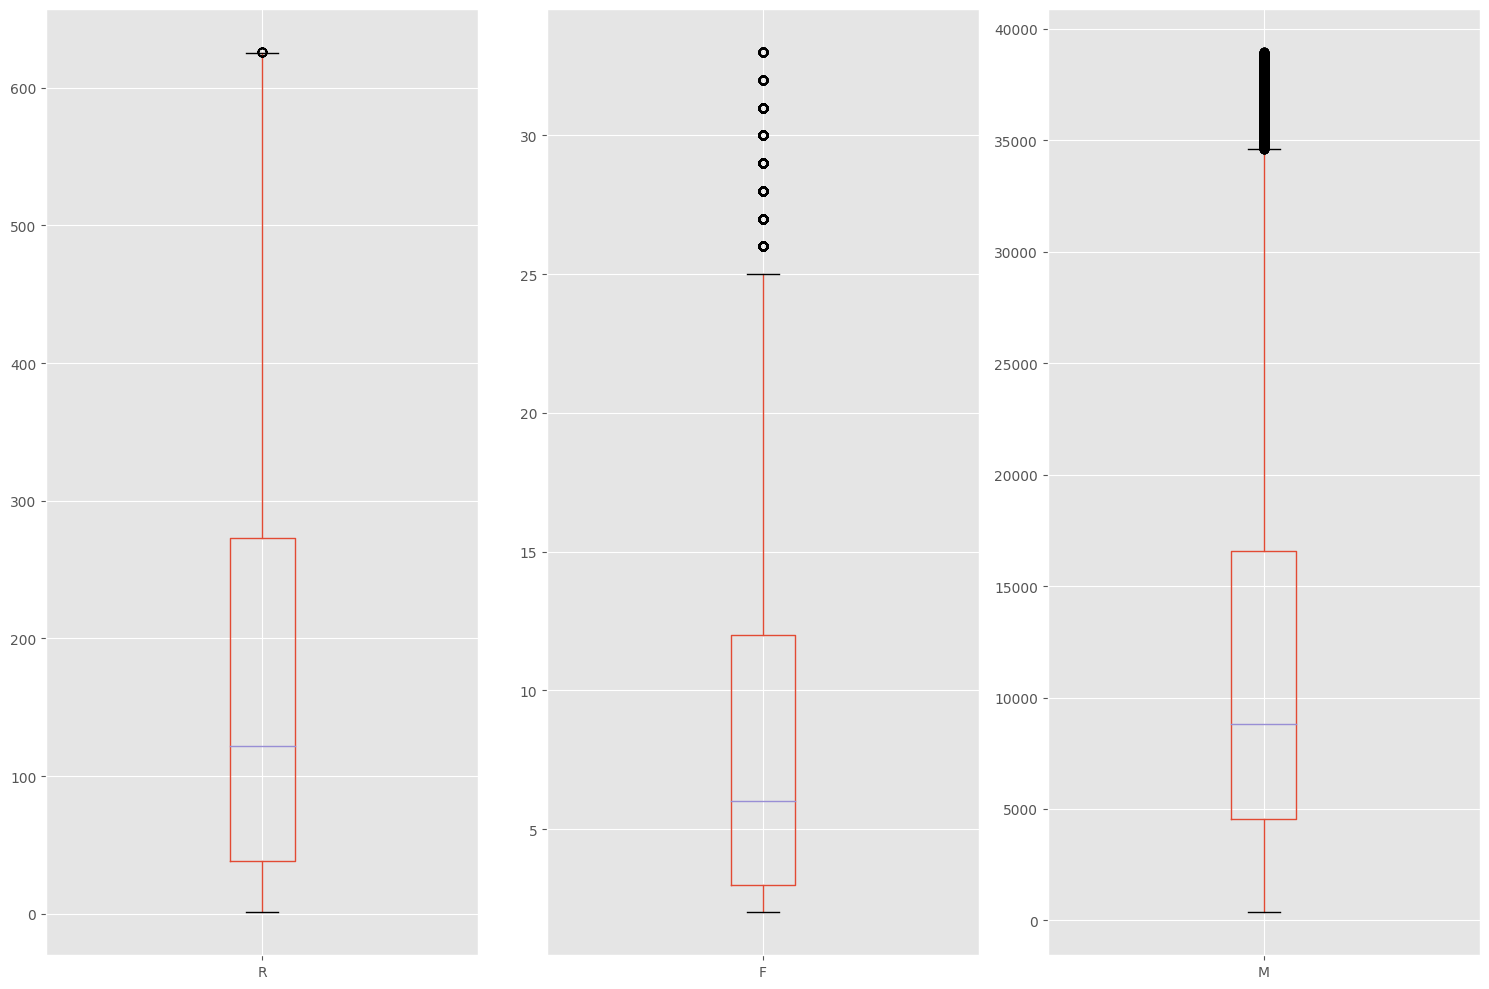

In [114]:
list_columns = list(df_rfm_cleaning.columns.values)

num_rows = 1
num_cols = 3

fig, ax = plt.subplots(num_rows, num_cols, figsize=(15,10))

for i, column_name in enumerate(list_columns):
    df_rfm_cleaning.boxplot(column_name, ax=ax.flatten()[i])

plt.tight_layout()
plt.show()

In [115]:
for i, j in df_rfm_cleaning.items():
    q1 = j.quantile(0.25)
    q3 = j.quantile(0.75)
    inter_q = q3 - q1

    j_col = j[(j < q1 - 1.5 * inter_q) | (j > q3 + 1.5 * inter_q)]
    percent = np.shape(j_col)[0] * 100.0 / np.shape(df)[0]
    print("Column %s outliers = %.2f" %(i, percent))

Column R outliers = 0.03
Column F outliers = 2.41
Column M outliers = 1.92


#### Scaling

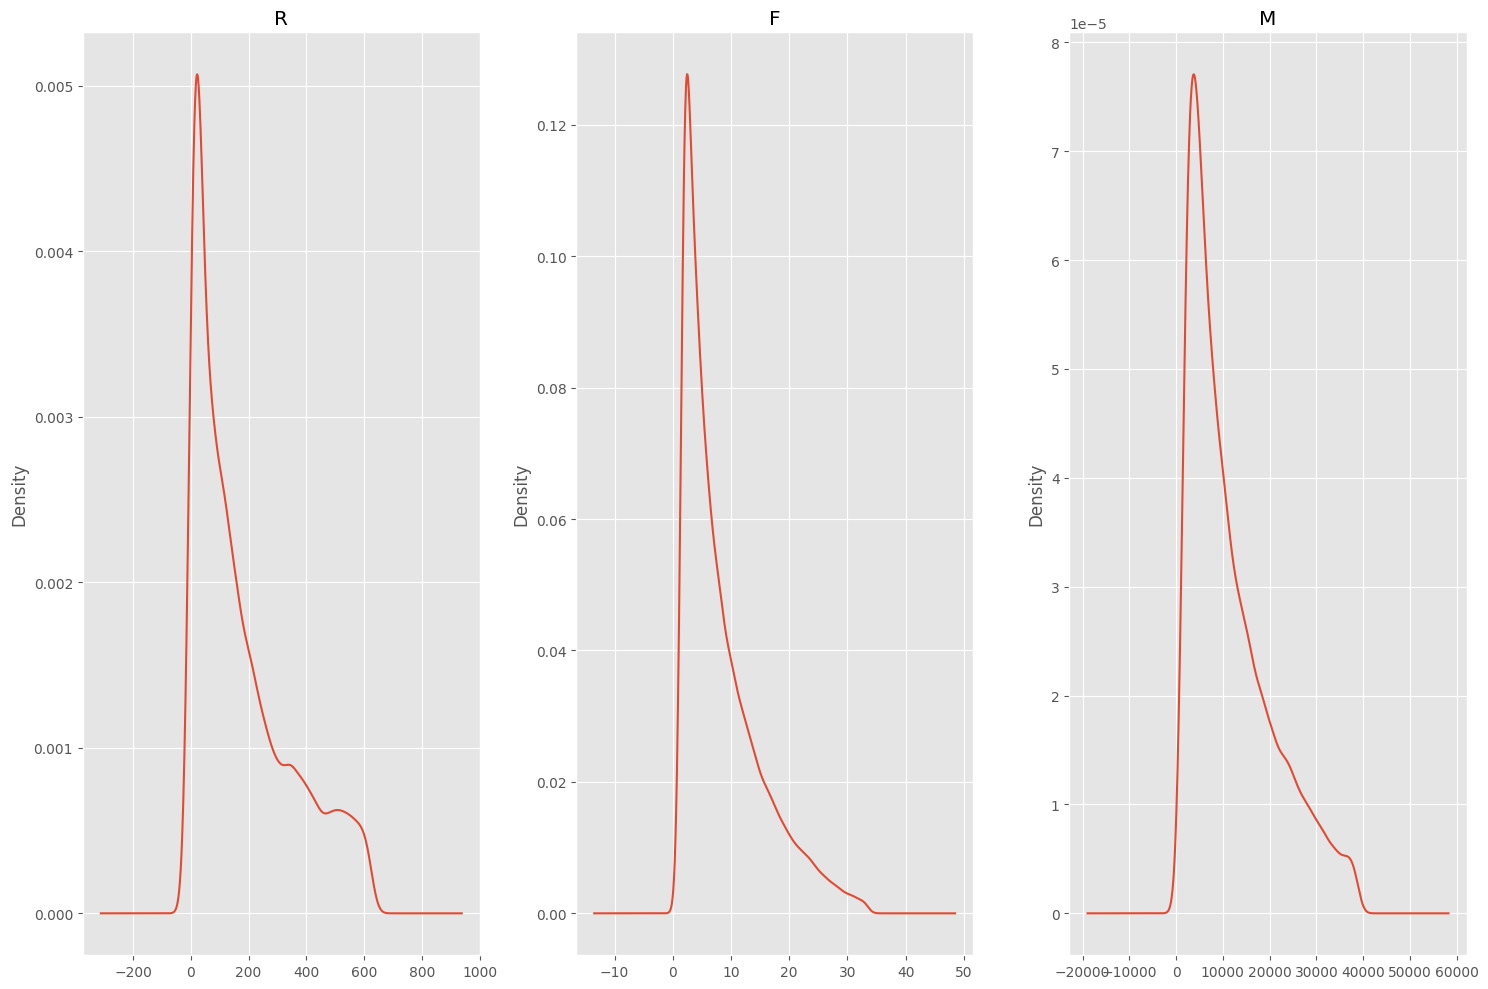

In [116]:
list_columns = list(df_rfm_cleaning.columns.values)

num_rows = 1
num_cols = 3

fig, ax = plt.subplots(num_rows, num_cols, figsize=(15,10))

for i, column_name in enumerate(list_columns):
    df_rfm_cleaning[column_name].plot(ax=ax.flatten()[i], kind='kde')
    ax.flatten()[i].set_title(column_name)

plt.tight_layout()
plt.show()

In [117]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_rfm_cleaning_scaled = scaler.fit_transform(df_rfm_cleaning)
df_rfm_cleaning_scaled = pd.DataFrame(df_rfm_cleaning_scaled, columns=df_rfm_cleaning.columns)

df_rfm_cleaning_scaled

R         F         M
0     -0.707017  2.651765  3.035557
1     -0.987977  3.403299  3.020133
2     -0.910265  2.952379  2.943575
3     -1.017867  3.553606  3.010857
4     -1.023845  2.050538  2.982916
...         ...       ...       ...
54075  0.715720 -0.955599 -1.172920
54076 -0.527680 -0.654985 -0.403760
54077 -0.886353 -0.955599 -1.009745
54078  1.331442 -0.955599 -0.859981
54079  1.349376 -0.955599 -0.827793

[54080 rows x 3 columns]

In [118]:
df_rfm_cleaning_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54080 entries, 0 to 54079
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   R       54080 non-null  float64
 1   F       54080 non-null  float64
 2   M       54080 non-null  float64
dtypes: float64(3)
memory usage: 1.2 MB


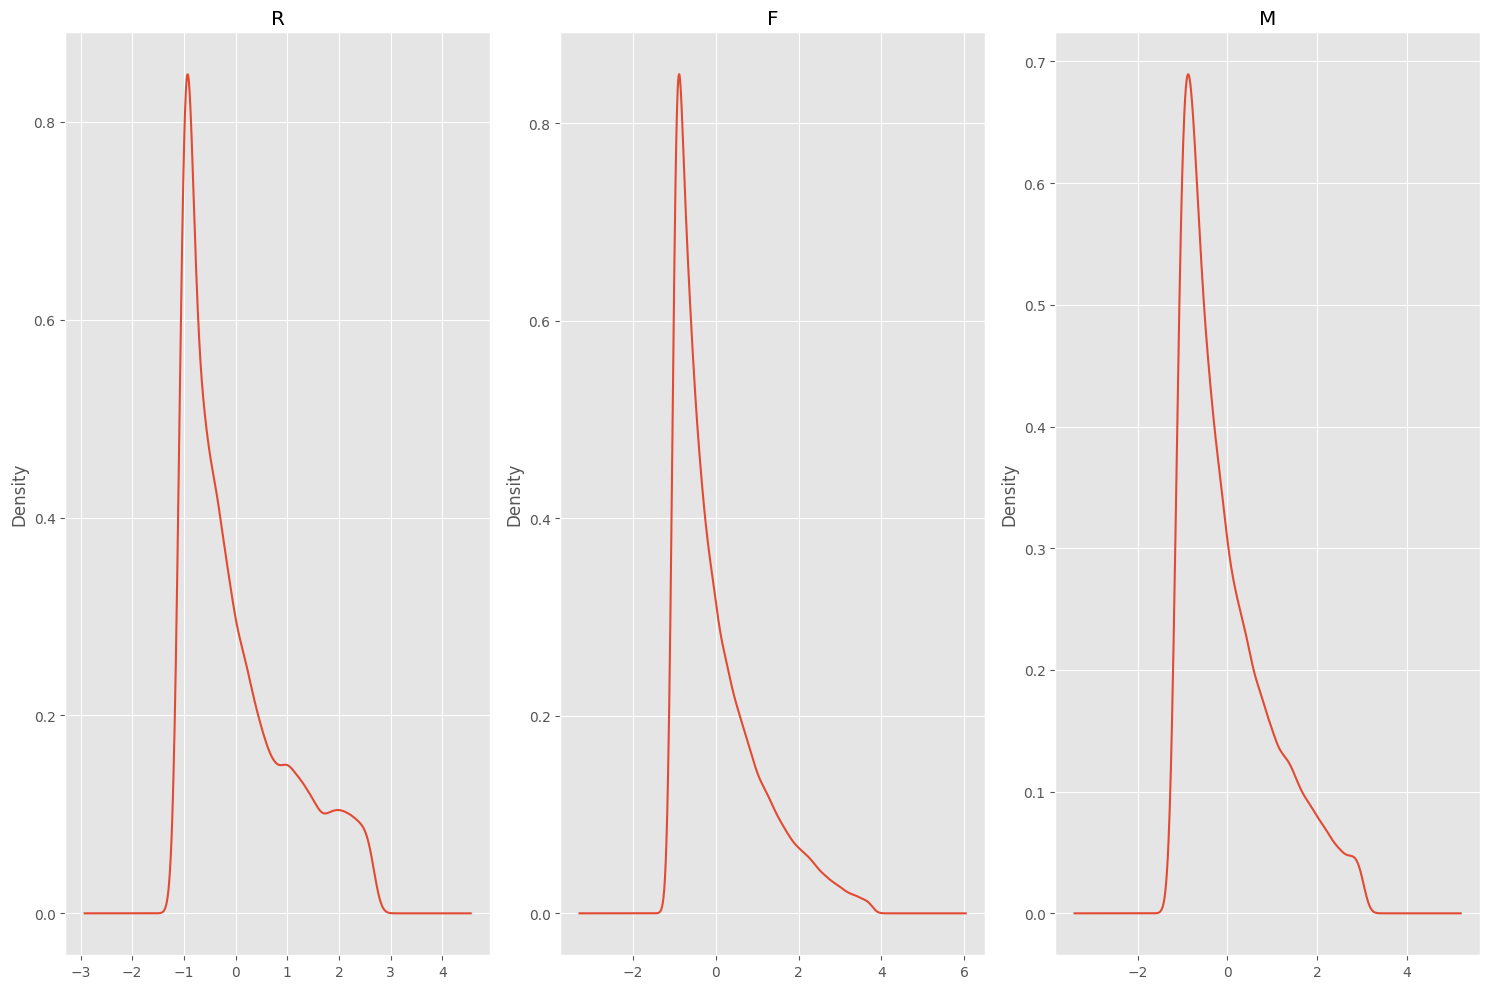

In [119]:
list_columns = list(df_rfm_cleaning_scaled.columns.values)

num_rows = 1
num_cols = 3

fig, ax = plt.subplots(num_rows, num_cols, figsize=(15,10))

for i, column_name in enumerate(list_columns):
    df_rfm_cleaning_scaled[column_name].plot(ax=ax.flatten()[i], kind='kde')
    ax.flatten()[i].set_title(column_name)

plt.tight_layout()
plt.show()

#### Pemodelan

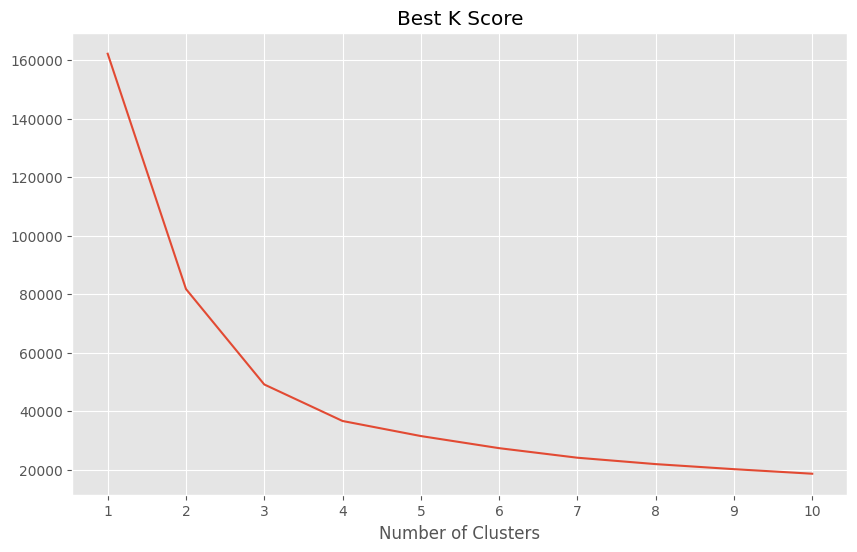

In [120]:
from sklearn.cluster import KMeans

score = []
k_value = range(1, 11)

for k in k_value:
    kmeans = KMeans(n_clusters= k, init='k-means++', random_state=42)
    kmeans.fit(df_rfm_cleaning_scaled)
    cluster = kmeans.fit_predict(df_rfm_cleaning_scaled)
    score.append(kmeans.inertia_)

fig, ax = plt.subplots(figsize=(10, 6))
plt.plot(k_value, score)
plt.xlabel('Number of Clusters')
plt.xticks(k_value)
plt.style.use('ggplot')
plt.title('Best K Score')
plt.show()

 For k = 8, the silhouette score is: [0.45530641972461605, 0.43766746625042746, 0.40372067803343253, 0.3521672309466065, 0.3321269153687029, 0.3434639952240266, 0.3321360157376149]


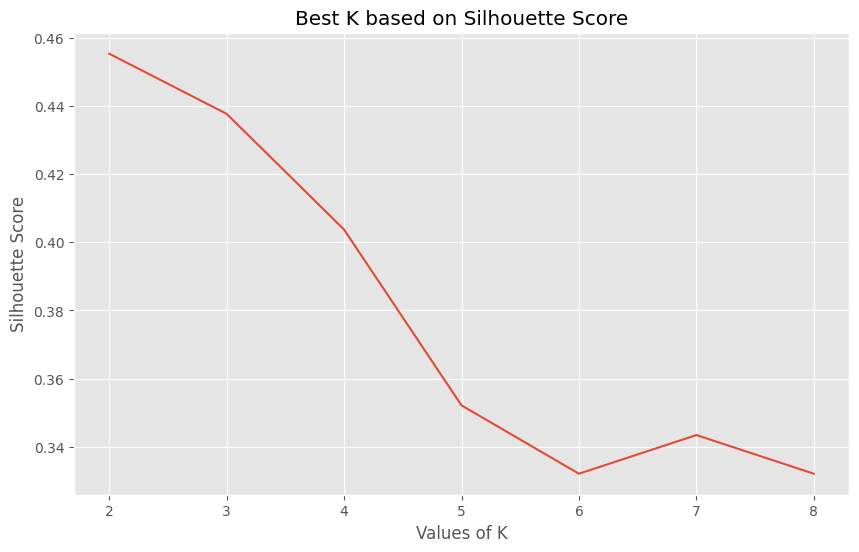

In [110]:
# Calculate Silhouette Score
from sklearn.metrics import silhouette_score

k_value = [2, 3, 4, 5, 6, 7, 8]
silhouette_avg = []

for k in k_value:
    kmeans = KMeans(n_clusters = k, random_state=42)
    kmeans.fit(df_rfm_cleaning_scaled)
    cluster_labels = kmeans.predict(df_rfm_cleaning_scaled)

    silhouette_avg.append(silhouette_score(df_rfm_cleaning_scaled, cluster_labels))

print(" For k = {}, the silhouette score is: {}".format(k, silhouette_avg))
fig, ax = plt.subplots(figsize=(10, 6))
plt.plot(k_value, silhouette_avg)
plt.xlabel('Values of K')
plt.xticks(k_value)
plt.ylabel('Silhouette Score')
plt.style.use('ggplot')
plt.title('Best K based on Silhouette Score')
plt.show()

In [121]:
df_cleaning_2_result = df_rfm_cleaning_scaled.copy()
df_cleaning_2_result

R         F         M
0     -0.707017  2.651765  3.035557
1     -0.987977  3.403299  3.020133
2     -0.910265  2.952379  2.943575
3     -1.017867  3.553606  3.010857
4     -1.023845  2.050538  2.982916
...         ...       ...       ...
54075  0.715720 -0.955599 -1.172920
54076 -0.527680 -0.654985 -0.403760
54077 -0.886353 -0.955599 -1.009745
54078  1.331442 -0.955599 -0.859981
54079  1.349376 -0.955599 -0.827793

[54080 rows x 3 columns]

In [122]:
# k = 2 (berdasarkan nilai silhouette)

kmeans = KMeans(n_clusters=2, init='k-means++', n_init=10, max_iter=10000, random_state=42)
kmeans.fit(df_cleaning_2_result)
df_cleaning_2_result['cluster'] = kmeans.labels_

df_cleaning_2_result

R         F         M  cluster
0     -0.707017  2.651765  3.035557        0
1     -0.987977  3.403299  3.020133        0
2     -0.910265  2.952379  2.943575        0
3     -1.017867  3.553606  3.010857        0
4     -1.023845  2.050538  2.982916        0
...         ...       ...       ...      ...
54075  0.715720 -0.955599 -1.172920        1
54076 -0.527680 -0.654985 -0.403760        1
54077 -0.886353 -0.955599 -1.009745        1
54078  1.331442 -0.955599 -0.859981        1
54079  1.349376 -0.955599 -0.827793        1

[54080 rows x 4 columns]

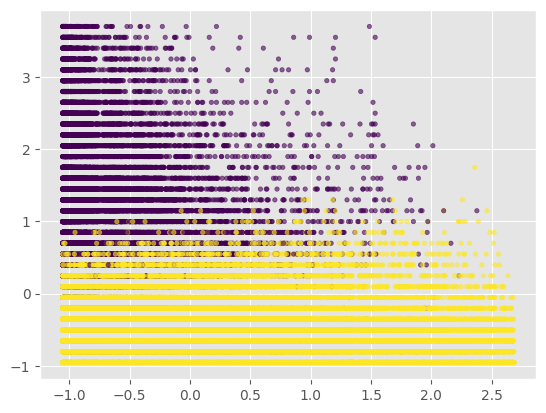

In [123]:
plt.scatter(df_cleaning_2_result.iloc[:, 0], df_cleaning_2_result.iloc[:, 1], c=df_cleaning_2_result['cluster'], alpha=0.6, s=10)
plt.show()

In [124]:
df_cleaning_2_result = df_cleaning_2_result.rename(columns={'LAST_TO_END' : 'R', 'FLIGHT_COUNT' : 'F', 'SEG_KM_SUM' : 'M'})
df_cleaning_2_result

R         F         M  cluster
0     -0.707017  2.651765  3.035557        0
1     -0.987977  3.403299  3.020133        0
2     -0.910265  2.952379  2.943575        0
3     -1.017867  3.553606  3.010857        0
4     -1.023845  2.050538  2.982916        0
...         ...       ...       ...      ...
54075  0.715720 -0.955599 -1.172920        1
54076 -0.527680 -0.654985 -0.403760        1
54077 -0.886353 -0.955599 -1.009745        1
54078  1.331442 -0.955599 -0.859981        1
54079  1.349376 -0.955599 -0.827793        1

[54080 rows x 4 columns]

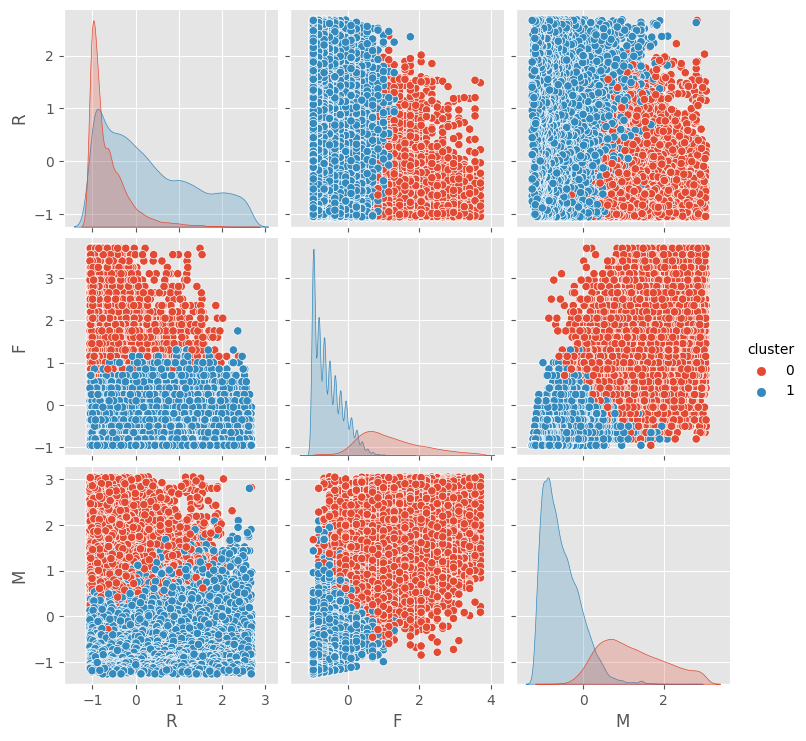

In [125]:
import seaborn as sns 

sns.pairplot(data=df_cleaning_2_result, hue='cluster')

In [133]:
df_rfm_cleaning.head()

R     F        M
0  59.0  26.0  38789.0
1  12.0  31.0  38651.0
2  25.0  28.0  37966.0
3   7.0  32.0  38568.0
4   6.0  22.0  38318.0

In [132]:
df_rfm_cleaning.drop(['index'], axis = 1, inplace=True)

In [134]:
df_rfm_cleaning['cluster'] = df_cleaning_2_result['cluster']
df_rfm_cleaning

R     F        M  cluster
0       59.0  26.0  38789.0        0
1       12.0  31.0  38651.0        0
2       25.0  28.0  37966.0        0
3        7.0  32.0  38568.0        0
4        6.0  22.0  38318.0        0
...      ...   ...      ...      ...
54075  297.0   2.0   1134.0        1
54076   89.0   4.0   8016.0        1
54077   29.0   2.0   2594.0        1
54078  400.0   2.0   3934.0        1
54079  403.0   2.0   4222.0        1

[54080 rows x 4 columns]

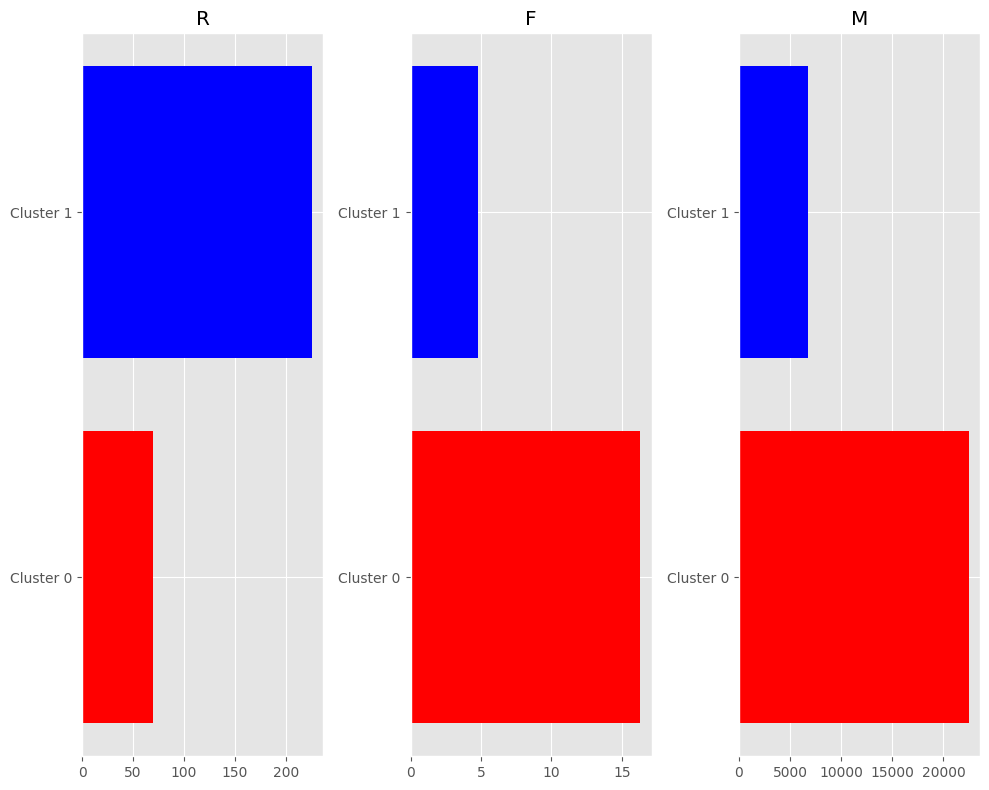

In [135]:
cluster_0 = df_rfm_cleaning[df_cleaning_2_result['cluster'] == 0].mean()
cluster_1 = df_rfm_cleaning[df_cleaning_2_result['cluster'] == 1].mean()

num_rows = 1
num_cols = 3

fig, ax = plt.subplots(num_rows, num_cols, figsize=(10, 8))
colors = ['red', 'blue']

for key, column_name in enumerate(['R', 'F', 'M']):
    ax[key].barh(y = [0,1], width = [cluster_0[column_name], cluster_1[column_name]], color=colors)
    ax[key].set_title(column_name)
    ax[key].set_yticks([0, 1])
    ax[key].set_yticklabels(['Cluster 0', 'Cluster 1'])

plt.tight_layout()
plt.show()

In [136]:
df_cleaning_3_result = df_rfm_cleaning_scaled.copy()
df_cleaning_3_result

R         F         M
0     -0.707017  2.651765  3.035557
1     -0.987977  3.403299  3.020133
2     -0.910265  2.952379  2.943575
3     -1.017867  3.553606  3.010857
4     -1.023845  2.050538  2.982916
...         ...       ...       ...
54075  0.715720 -0.955599 -1.172920
54076 -0.527680 -0.654985 -0.403760
54077 -0.886353 -0.955599 -1.009745
54078  1.331442 -0.955599 -0.859981
54079  1.349376 -0.955599 -0.827793

[54080 rows x 3 columns]

In [137]:
# k = 3 (berdasarkan elbow method)

from mpl_toolkits.mplot3d import Axes3D

kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=10000, random_state=42)
kmeans.fit(df_rfm_cleaning_scaled)
df_cleaning_3_result['cluster'] = kmeans.labels_

df_cleaning_3_result

R         F         M  cluster
0     -0.707017  2.651765  3.035557        0
1     -0.987977  3.403299  3.020133        0
2     -0.910265  2.952379  2.943575        0
3     -1.017867  3.553606  3.010857        0
4     -1.023845  2.050538  2.982916        0
...         ...       ...       ...      ...
54075  0.715720 -0.955599 -1.172920        2
54076 -0.527680 -0.654985 -0.403760        1
54077 -0.886353 -0.955599 -1.009745        1
54078  1.331442 -0.955599 -0.859981        2
54079  1.349376 -0.955599 -0.827793        2

[54080 rows x 4 columns]

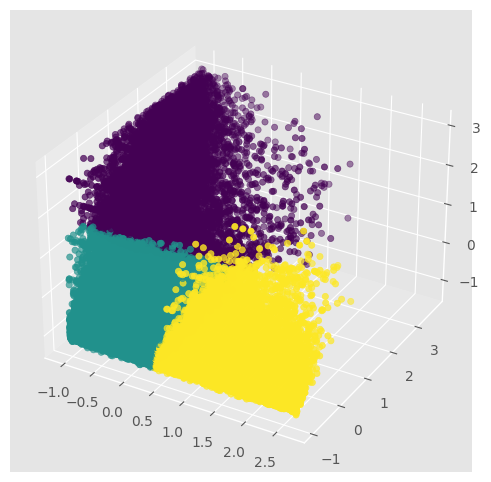

In [138]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_rfm_cleaning_scaled.iloc[:, 0], df_rfm_cleaning_scaled.iloc[:, 1], df_rfm_cleaning_scaled.iloc[:, 2], c=df_cleaning_3_result['cluster'])

plt.show()

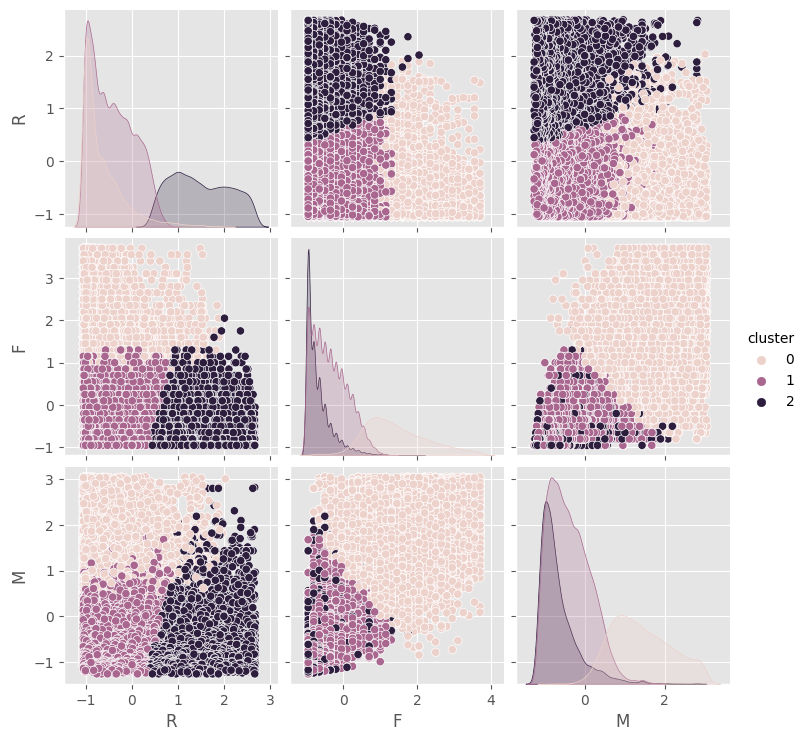

In [139]:
import seaborn as sns 

sns.pairplot(data=df_cleaning_3_result, hue='cluster')

In [140]:
df_rfm_cleaning['cluster'] = df_cleaning_3_result['cluster']
df_rfm_cleaning

R     F        M  cluster
0       59.0  26.0  38789.0        0
1       12.0  31.0  38651.0        0
2       25.0  28.0  37966.0        0
3        7.0  32.0  38568.0        0
4        6.0  22.0  38318.0        0
...      ...   ...      ...      ...
54075  297.0   2.0   1134.0        2
54076   89.0   4.0   8016.0        1
54077   29.0   2.0   2594.0        1
54078  400.0   2.0   3934.0        2
54079  403.0   2.0   4222.0        2

[54080 rows x 4 columns]

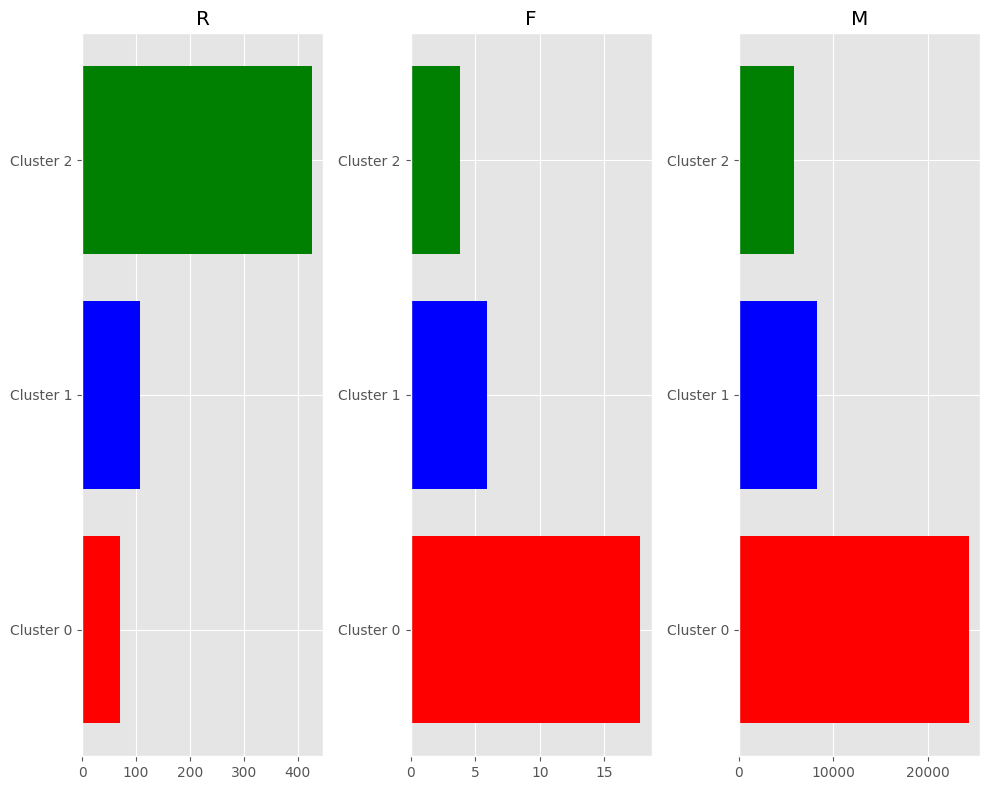

In [141]:
cluster_0 = df_rfm_cleaning[df_rfm_cleaning['cluster'] == 0].mean()
cluster_1 = df_rfm_cleaning[df_rfm_cleaning['cluster'] == 1].mean()
cluster_2 = df_rfm_cleaning[df_rfm_cleaning['cluster'] == 2].mean()

num_rows = 1
num_cols = 3

fig, ax = plt.subplots(num_rows, num_cols, figsize=(10, 8))
colors = ['red', 'blue', 'green']

for key, column_name in enumerate(['R', 'F', 'M']):
    ax[key].barh(y = [0,1,2], width = [cluster_0[column_name], cluster_1[column_name], cluster_2[column_name]], color=colors)
    ax[key].set_title(column_name)
    ax[key].set_yticks([0, 1, 2])
    ax[key].set_yticklabels(['Cluster 0', 'Cluster 1', 'Cluster 2'])



plt.tight_layout()
plt.show()

Dengan menghapus outlier, kita kehilangan 9.120 data sekitar 14%. Maka dari itu, saya mencoba cara lain untuk membandingkan.

### 2. Handle Outlier dengan Mengganti menjadi Nilai Median

In [142]:
df_rfm_median = df_rfm[['R', 'F', 'M']]
df_rfm_median

R    F       M
0        1  210  580717
1        7  140  293678
2       11  135  283712
3       97   23  281336
4        5  152  309928
...    ...  ...     ...
62983  297    2    1134
62984   89    4    8016
62985   29    2    2594
62986  400    2    3934
62987  403    2    4222

[62988 rows x 3 columns]

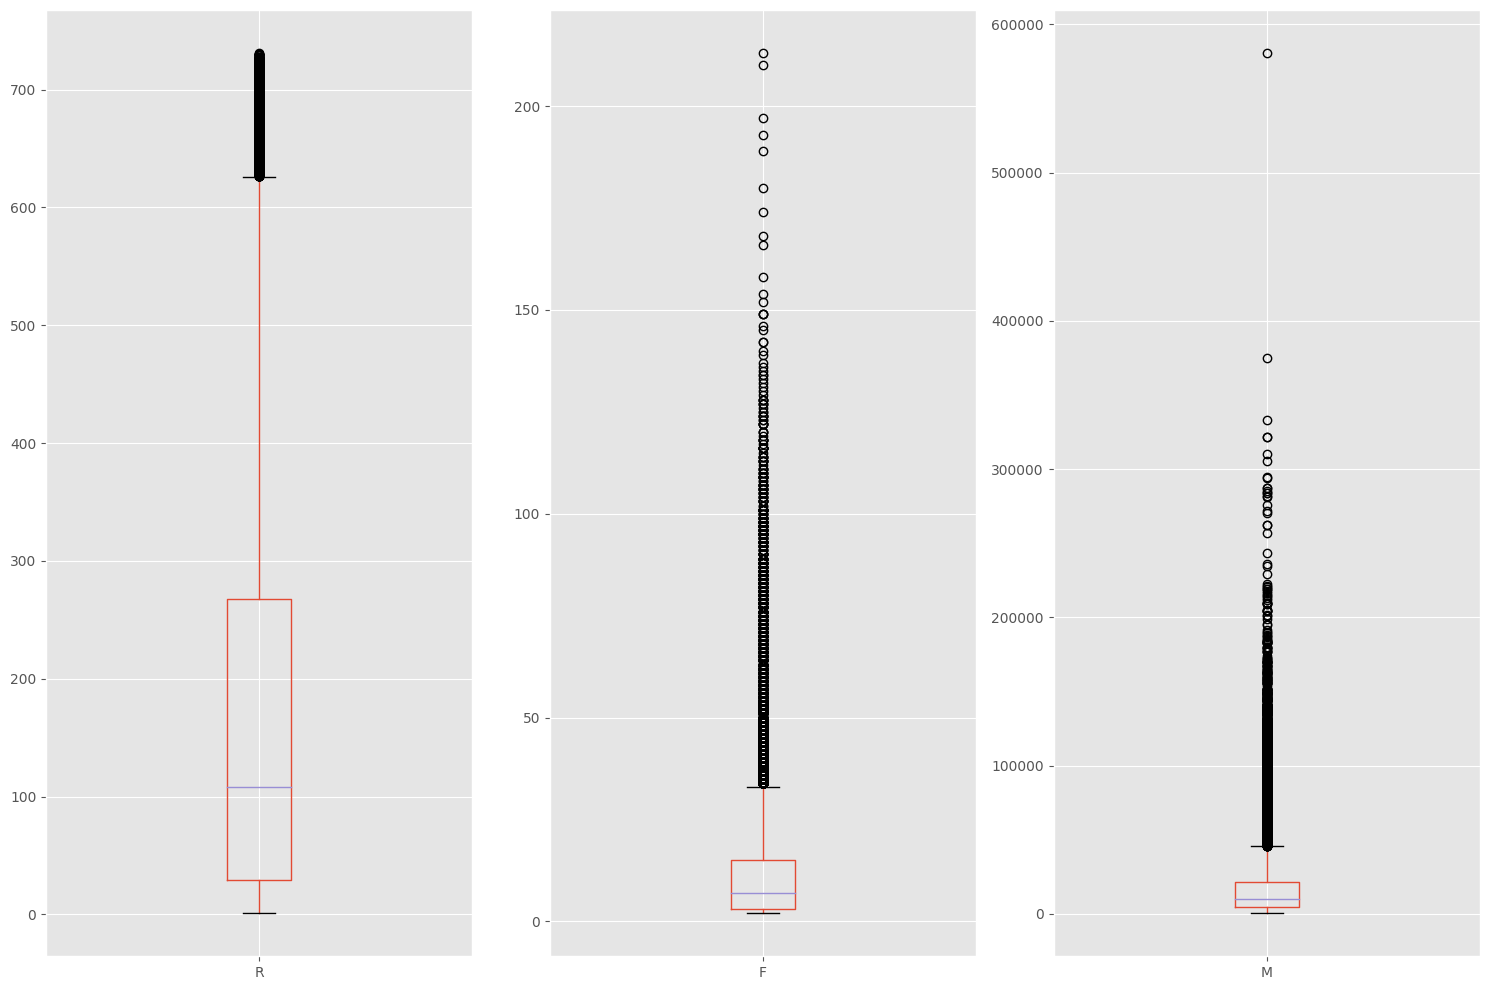

In [143]:
list_columns = list(df_rfm_median.columns.values)

num_rows = 1
num_cols = 3

fig, ax = plt.subplots(num_rows, num_cols, figsize=(15,10))

for i, column_name in enumerate(list_columns):
    df_rfm_median.boxplot(column_name, ax=ax.flatten()[i])

plt.tight_layout()
plt.show()

In [144]:
for i, j in df_rfm_median.items():
    q1 = j.quantile(0.25)
    q3 = j.quantile(0.75)
    inter_q = q3 - q1

    j_col = j[(j <= q1 - 1.5 * inter_q) | (j >= q3 + 1.5 * inter_q)]
    percent = np.shape(j_col)[0] * 100.0 / np.shape(df)[0]
    print("Column %s outliers = %.2f" %(i, percent))

Column R outliers = 2.91
Column F outliers = 7.26
Column M outliers = 7.61


In [145]:
# Mengganti outlier pada kolom  dengan null

q1 = df_rfm_median.quantile(0.25)
q3 = df_rfm_median.quantile(0.75)

inter_q = q3 - q1

upper = q3 + 1.5 * inter_q
lower = q1 - 1.5 * inter_q

for i in df_rfm_median.columns:

    mask = np.logical_or(df_rfm_median[i] >= upper[i], df_rfm_median[i] <= lower[i])
    
    df_rfm_median.loc[mask, i] = np.nan

In [146]:
df_rfm_median.isna().sum()

R    1835
F    4570
M    4792
dtype: int64

In [147]:
df_rfm_median.median()

R     102.0
F       6.0
M    8953.5
dtype: float64

In [148]:
df_rfm_median.fillna(df_rfm_median.median(), inplace = True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_9536\1653788230.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rfm_median.fillna(df_rfm_median.median(), inplace = True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_9536\1653788230.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rfm_median.fillna(df_rfm_median.median(), inplace = True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_9536\1653788230.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

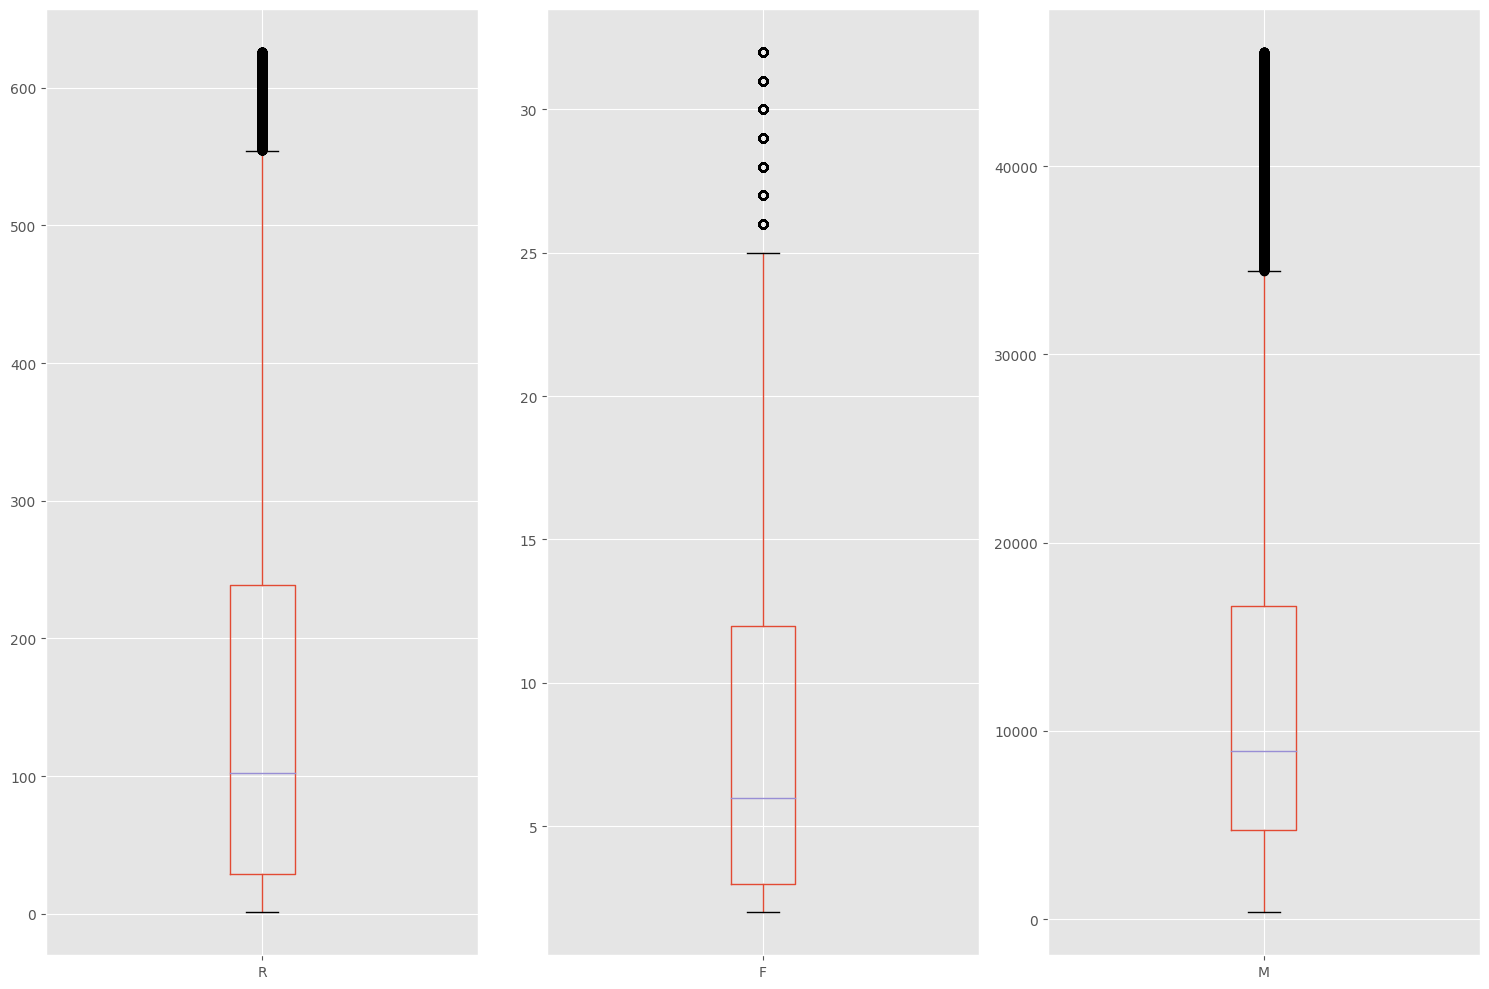

In [149]:
list_columns = list(df_rfm_median.columns.values)

num_rows = 1
num_cols = 3

fig, ax = plt.subplots(num_rows, num_cols, figsize=(15,10))

for i, column_name in enumerate(list_columns):
    df_rfm_median.boxplot(column_name, ax=ax.flatten()[i])

plt.tight_layout()
plt.show()

In [150]:
for i, j in df_rfm_median.items():
    q1 = j.quantile(0.25)
    q3 = j.quantile(0.75)
    inter_q = q3 - q1

    j_col = j[(j <= q1 - 1.5 * inter_q) | (j >= q3 + 1.5 * inter_q)]
    percent = np.shape(j_col)[0] * 100.0 / np.shape(df)[0]
    print("Column %s outliers = %.2f" %(i, percent))

Column R outliers = 3.37
Column F outliers = 4.04
Column M outliers = 5.12


#### Scaling

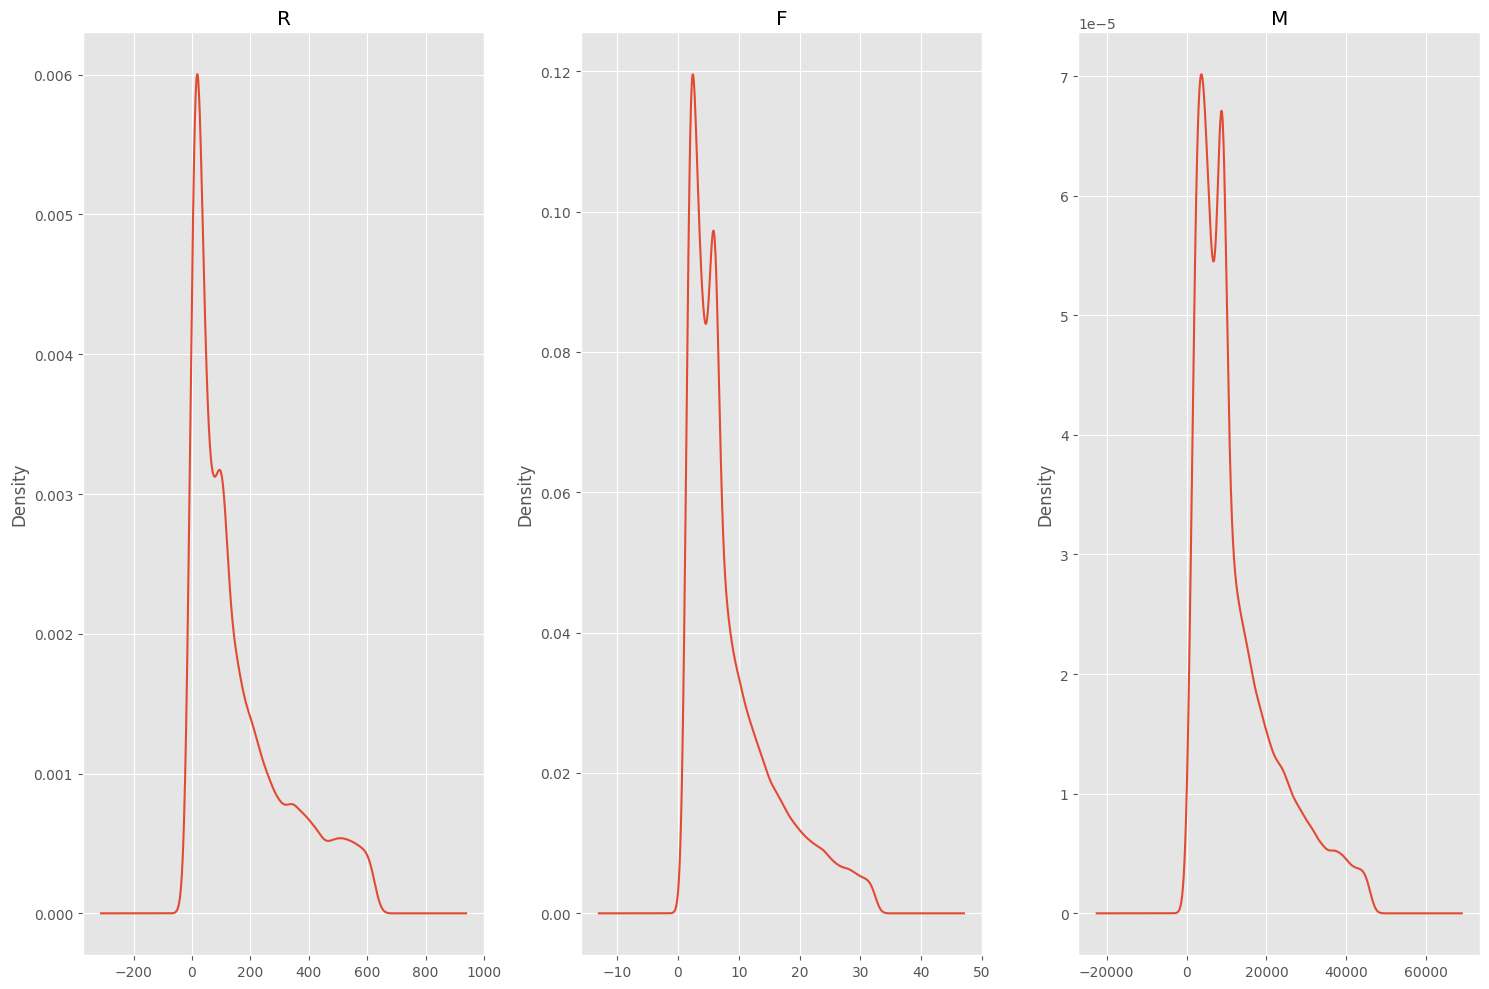

In [151]:
list_columns = list(df_rfm_median.columns.values)

num_rows = 1
num_cols = 3

fig, ax = plt.subplots(num_rows, num_cols, figsize=(15,10))

for i, column_name in enumerate(list_columns):
    df_rfm_median[column_name].plot(ax=ax.flatten()[i], kind='kde')
    ax.flatten()[i].set_title(column_name)

plt.tight_layout()
plt.show()

In [152]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_rfm_median_scaled = scaler.fit_transform(df_rfm_median)
df_rfm_median_scaled = pd.DataFrame(df_rfm_median_scaled, columns=df_rfm_median.columns)

df_rfm_median_scaled

R         F         M
0     -0.974421 -0.366238 -0.326762
1     -0.937529 -0.366238 -0.326762
2     -0.912935 -0.366238 -0.326762
3     -0.384160  2.060816 -0.326762
4     -0.949827 -0.366238 -0.326762
...         ...       ...       ...
62983  0.845551 -0.937309 -1.105151
62984 -0.433348 -0.651773 -0.420085
62985 -0.802261 -0.937309 -0.959816
62986  1.478852 -0.937309 -0.826426
62987  1.497298 -0.937309 -0.797757

[62988 rows x 3 columns]

In [153]:
df_rfm_median_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   R       62988 non-null  float64
 1   F       62988 non-null  float64
 2   M       62988 non-null  float64
dtypes: float64(3)
memory usage: 1.4 MB


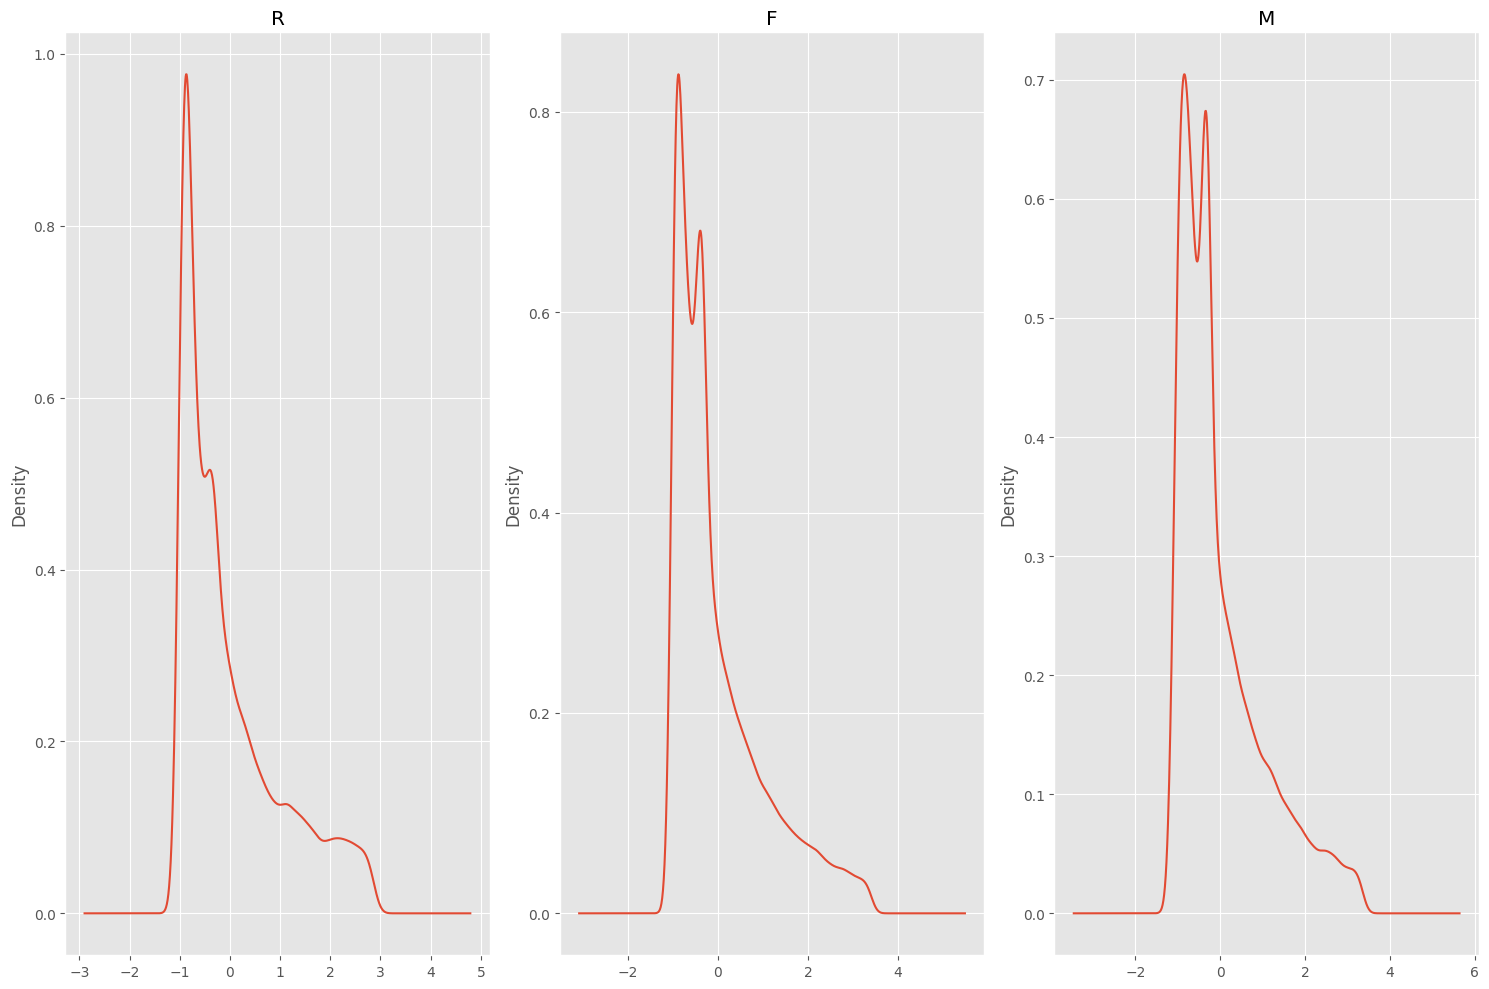

In [154]:
list_columns = list(df_rfm_median_scaled.columns.values)

num_rows = 1
num_cols = 3

fig, ax = plt.subplots(num_rows, num_cols, figsize=(15,10))

for i, column_name in enumerate(list_columns):
    df_rfm_median_scaled[column_name].plot(ax=ax.flatten()[i], kind='kde')
    ax.flatten()[i].set_title(column_name)

plt.tight_layout()
plt.show()

#### Pemodelan

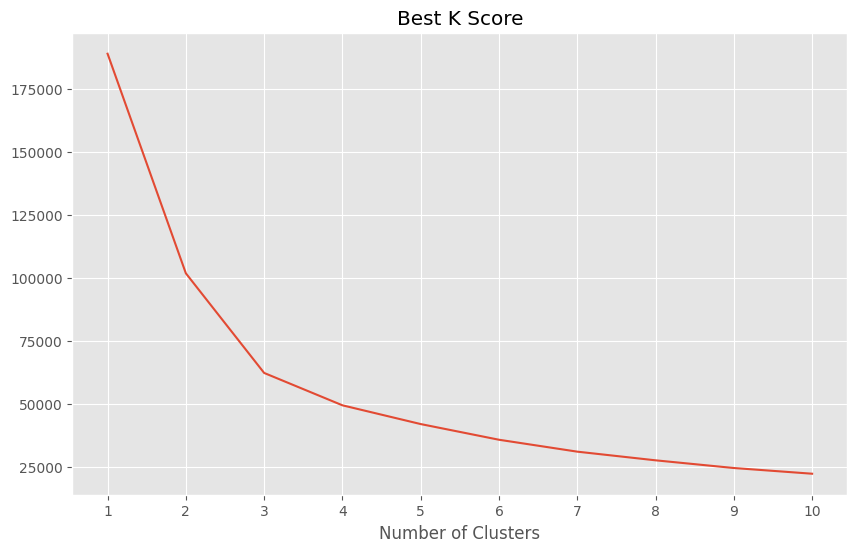

In [155]:
from sklearn.cluster import KMeans

score = []
k_value = range(1, 11)

for k in k_value:
    kmeans = KMeans(n_clusters= k, init='k-means++', random_state=42)
    kmeans.fit(df_rfm_median_scaled)
    cluster = kmeans.fit_predict(df_rfm_median_scaled)
    score.append(kmeans.inertia_)

fig, ax = plt.subplots(figsize=(10, 6))
plt.plot(k_value, score)
plt.xlabel('Number of Clusters')
plt.xticks(k_value)
plt.style.use('ggplot')
plt.title('Best K Score')
plt.show()

 For k = 8, the silhouette score is: [0.451364100979758, 0.44719169448626905, 0.40958895278534857, 0.4056886187525855, 0.36710645961701893, 0.35470634468143736, 0.3418295846267947]


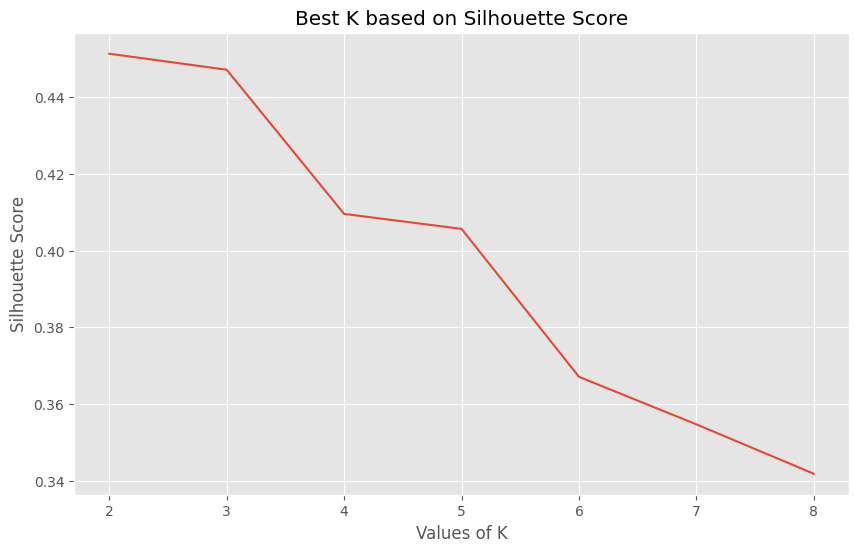

In [156]:
# Calculate Silhouette Score
from sklearn.metrics import silhouette_score

k_value = [2, 3, 4, 5, 6, 7, 8]
silhouette_avg = []

for k in k_value:
    kmeans = KMeans(n_clusters = k, random_state=42)
    kmeans.fit(df_rfm_median_scaled)
    cluster_labels = kmeans.predict(df_rfm_median_scaled)

    silhouette_avg.append(silhouette_score(df_rfm_median_scaled, cluster_labels))

print(" For k = {}, the silhouette score is: {}".format(k, silhouette_avg))
fig, ax = plt.subplots(figsize=(10, 6))
plt.plot(k_value, silhouette_avg)
plt.xlabel('Values of K')
plt.xticks(k_value)
plt.ylabel('Silhouette Score')
plt.style.use('ggplot')
plt.title('Best K based on Silhouette Score')
plt.show()

In [157]:
df_median_2_result = df_rfm_median_scaled.copy()
df_median_2_result

R         F         M
0     -0.974421 -0.366238 -0.326762
1     -0.937529 -0.366238 -0.326762
2     -0.912935 -0.366238 -0.326762
3     -0.384160  2.060816 -0.326762
4     -0.949827 -0.366238 -0.326762
...         ...       ...       ...
62983  0.845551 -0.937309 -1.105151
62984 -0.433348 -0.651773 -0.420085
62985 -0.802261 -0.937309 -0.959816
62986  1.478852 -0.937309 -0.826426
62987  1.497298 -0.937309 -0.797757

[62988 rows x 3 columns]

In [158]:
# k = 2 (berdasarkan nilai silhouette)

kmeans = KMeans(n_clusters=2, init='k-means++', n_init=10, max_iter=10000, random_state=42)
kmeans.fit(df_median_2_result)
df_median_2_result['cluster'] = kmeans.labels_

df_median_2_result

R         F         M  cluster
0     -0.974421 -0.366238 -0.326762        0
1     -0.937529 -0.366238 -0.326762        0
2     -0.912935 -0.366238 -0.326762        0
3     -0.384160  2.060816 -0.326762        1
4     -0.949827 -0.366238 -0.326762        0
...         ...       ...       ...      ...
62983  0.845551 -0.937309 -1.105151        0
62984 -0.433348 -0.651773 -0.420085        0
62985 -0.802261 -0.937309 -0.959816        0
62986  1.478852 -0.937309 -0.826426        0
62987  1.497298 -0.937309 -0.797757        0

[62988 rows x 4 columns]

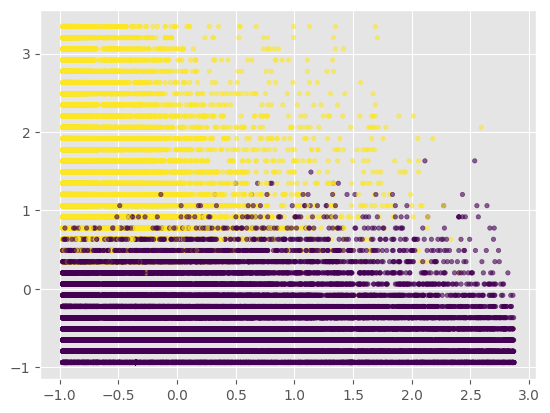

In [159]:
plt.scatter(df_median_2_result.iloc[:, 0], df_median_2_result.iloc[:, 1], c=df_median_2_result['cluster'], alpha=0.6, s=10)
plt.show()

In [160]:
df_median_2_result = df_median_2_result.rename(columns={'LAST_TO_END' : 'R', 'FLIGHT_COUNT' : 'F', 'SEG_KM_SUM' : 'M'})
df_median_2_result

R         F         M  cluster
0     -0.974421 -0.366238 -0.326762        0
1     -0.937529 -0.366238 -0.326762        0
2     -0.912935 -0.366238 -0.326762        0
3     -0.384160  2.060816 -0.326762        1
4     -0.949827 -0.366238 -0.326762        0
...         ...       ...       ...      ...
62983  0.845551 -0.937309 -1.105151        0
62984 -0.433348 -0.651773 -0.420085        0
62985 -0.802261 -0.937309 -0.959816        0
62986  1.478852 -0.937309 -0.826426        0
62987  1.497298 -0.937309 -0.797757        0

[62988 rows x 4 columns]

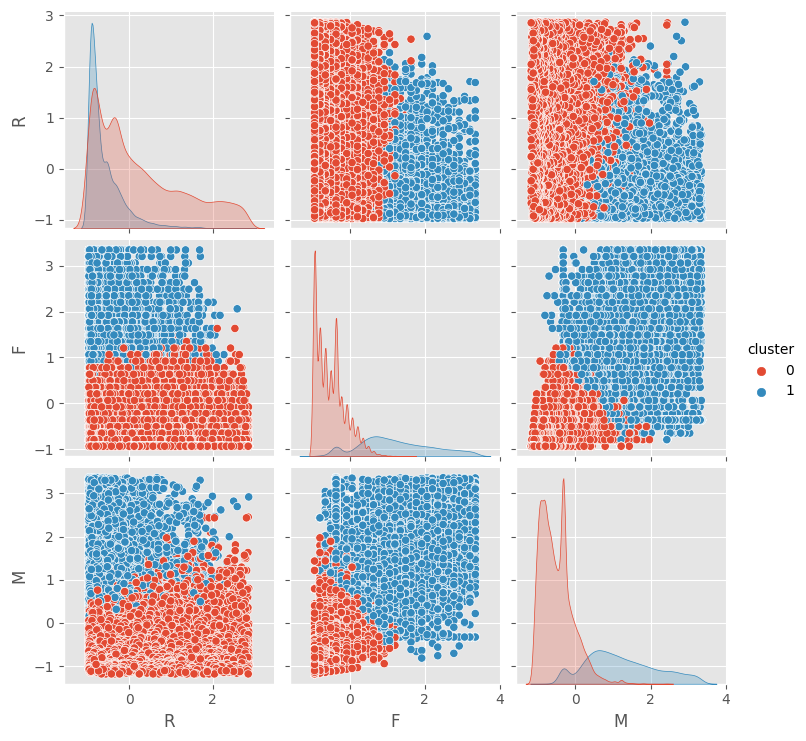

In [161]:
import seaborn as sns 

sns.pairplot(data=df_median_2_result, hue='cluster')

In [162]:
df_rfm_median['cluster'] = df_median_2_result['cluster']
df_rfm_median

R     F       M  cluster
0        1.0   6.0  8953.5        0
1        7.0   6.0  8953.5        0
2       11.0   6.0  8953.5        0
3       97.0  23.0  8953.5        1
4        5.0   6.0  8953.5        0
...      ...   ...     ...      ...
62983  297.0   2.0  1134.0        0
62984   89.0   4.0  8016.0        0
62985   29.0   2.0  2594.0        0
62986  400.0   2.0  3934.0        0
62987  403.0   2.0  4222.0        0

[62988 rows x 4 columns]

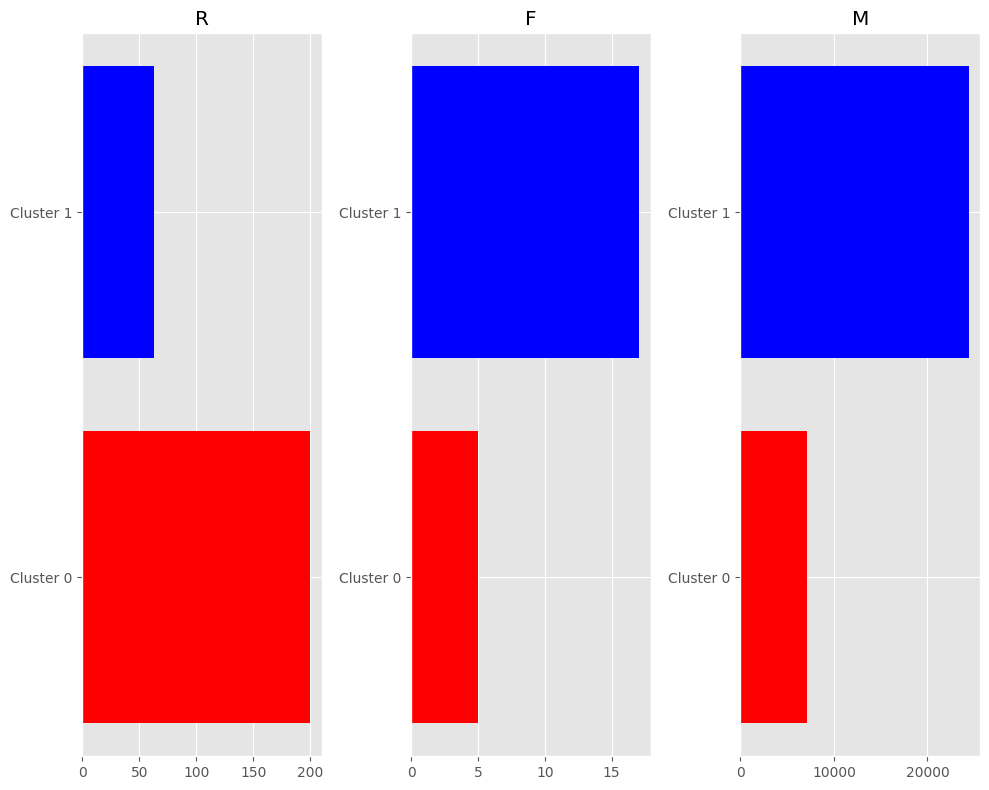

In [163]:
cluster_0 = df_rfm_median[df_median_2_result['cluster'] == 0].mean()
cluster_1 = df_rfm_median[df_median_2_result['cluster'] == 1].mean()

num_rows = 1
num_cols = 3

fig, ax = plt.subplots(num_rows, num_cols, figsize=(10, 8))
colors = ['red', 'blue']

for key, column_name in enumerate(['R', 'F', 'M']):
    ax[key].barh(y = [0,1], width = [cluster_0[column_name], cluster_1[column_name]], color=colors)
    ax[key].set_title(column_name)
    ax[key].set_yticks([0, 1])
    ax[key].set_yticklabels(['Cluster 0', 'Cluster 1'])

plt.tight_layout()
plt.show()

In [164]:
df_median_3_result = df_rfm_median_scaled.copy()
df_median_3_result

R         F         M
0     -0.974421 -0.366238 -0.326762
1     -0.937529 -0.366238 -0.326762
2     -0.912935 -0.366238 -0.326762
3     -0.384160  2.060816 -0.326762
4     -0.949827 -0.366238 -0.326762
...         ...       ...       ...
62983  0.845551 -0.937309 -1.105151
62984 -0.433348 -0.651773 -0.420085
62985 -0.802261 -0.937309 -0.959816
62986  1.478852 -0.937309 -0.826426
62987  1.497298 -0.937309 -0.797757

[62988 rows x 3 columns]

In [165]:
# k = 3 (berdasarkan elbow method)

from mpl_toolkits.mplot3d import Axes3D

kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=10000, random_state=42)
kmeans.fit(df_rfm_median_scaled)
df_median_3_result['cluster'] = kmeans.labels_

df_median_3_result

R         F         M  cluster
0     -0.974421 -0.366238 -0.326762        1
1     -0.937529 -0.366238 -0.326762        1
2     -0.912935 -0.366238 -0.326762        1
3     -0.384160  2.060816 -0.326762        2
4     -0.949827 -0.366238 -0.326762        1
...         ...       ...       ...      ...
62983  0.845551 -0.937309 -1.105151        0
62984 -0.433348 -0.651773 -0.420085        1
62985 -0.802261 -0.937309 -0.959816        1
62986  1.478852 -0.937309 -0.826426        0
62987  1.497298 -0.937309 -0.797757        0

[62988 rows x 4 columns]

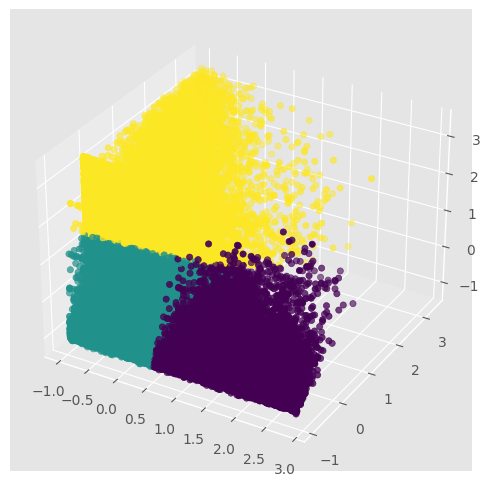

In [166]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_rfm_median_scaled.iloc[:, 0], df_rfm_median_scaled.iloc[:, 1], df_rfm_median_scaled.iloc[:, 2], c=df_median_3_result['cluster'])

plt.show()

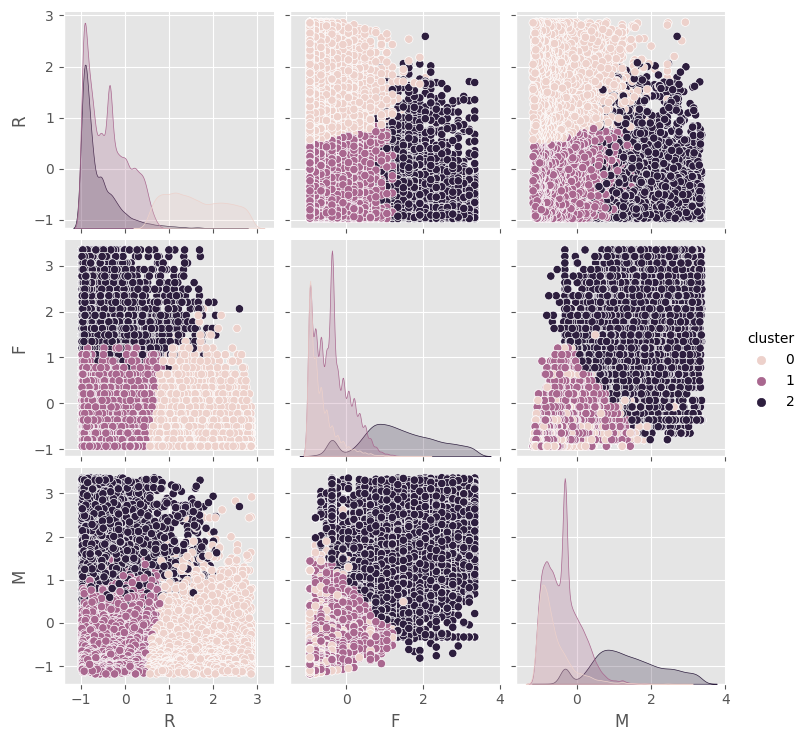

In [167]:
import seaborn as sns 

sns.pairplot(data=df_median_3_result, hue='cluster')

In [168]:
df_rfm_median['cluster'] = df_median_3_result['cluster']
df_rfm_median

R     F       M  cluster
0        1.0   6.0  8953.5        1
1        7.0   6.0  8953.5        1
2       11.0   6.0  8953.5        1
3       97.0  23.0  8953.5        2
4        5.0   6.0  8953.5        1
...      ...   ...     ...      ...
62983  297.0   2.0  1134.0        0
62984   89.0   4.0  8016.0        1
62985   29.0   2.0  2594.0        1
62986  400.0   2.0  3934.0        0
62987  403.0   2.0  4222.0        0

[62988 rows x 4 columns]

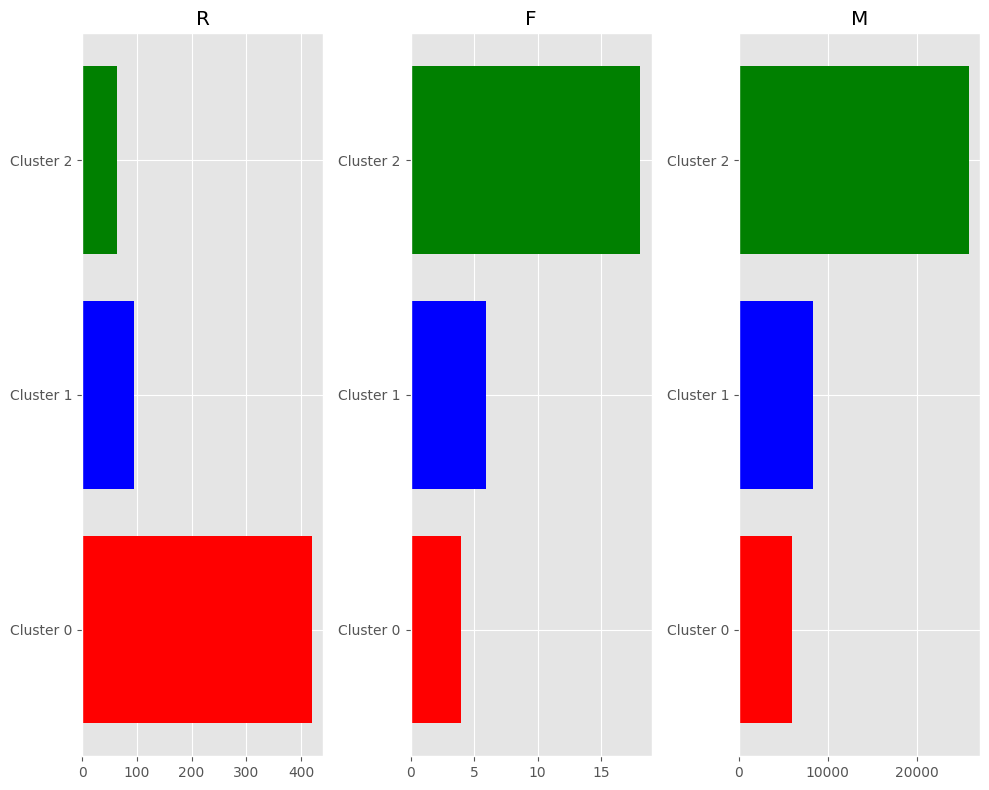

In [169]:
cluster_0 = df_rfm_median[df_rfm_median['cluster'] == 0].mean()
cluster_1 = df_rfm_median[df_rfm_median['cluster'] == 1].mean()
cluster_2 = df_rfm_median[df_rfm_median['cluster'] == 2].mean()

num_rows = 1
num_cols = 3

fig, ax = plt.subplots(num_rows, num_cols, figsize=(10, 8))
colors = ['red', 'blue', 'green']

for key, column_name in enumerate(['R', 'F', 'M']):
    ax[key].barh(y = [0,1,2], width = [cluster_0[column_name], cluster_1[column_name], cluster_2[column_name]], color=colors)
    ax[key].set_title(column_name)
    ax[key].set_yticks([0, 1, 2])
    ax[key].set_yticklabels(['Cluster 0', 'Cluster 1', 'Cluster 2'])



plt.tight_layout()
plt.show()